In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
pd.set_option('display.max_columns', None)

In [4]:
data =pd.read_csv('/content/drive/MyDrive/cybercrime/Dataset.csv')

In [5]:
data.head()

1)   Gender 2)    Age        3)    Education Level   \
0      Female     18-29  Postgraduate (Master’s, PhD)   
1      Female     18-29  Undergraduate (Diploma, BSc)   
2      Female     18-29  Undergraduate (Diploma, BSc)   
3      Female     18-29  Undergraduate (Diploma, BSc)   
4        Male     18-29  Undergraduate (Diploma, BSc)   

                  4)   Major 5)  administrative regions  \
0           Computer Science                        NaN   
1  Medicine or public health                        NaN   
2  Medicine or public health                        NaN   
3  Medicine or public health                        NaN   
4                Engineering                        NaN   

  6)  How often do you use the Internet and Internet-related services? (E.g. Email, WhatsApp, News, YouTube    \
0                      Frequently throughout the day                                                            
1                      Frequently throughout the day                                                            
2                      Frequently throughout the day                                                            
3                      Frequently throughout the day                                                            
4                      Frequently throughout the day                                                            

  7) What are your Internet/ Digital devices skills level?  \
0  Intermediate (e.g. able to install and run spe...         
1  Intermediate (e.g. able to install and run spe...         
2  Intermediate (e.g. able to install and run spe...         
3  Intermediate (e.g. able to install and run spe...         
4  Intermediate (e.g. able to install and run spe...         

  8)   Of the following, which digital devices do you use regularly? Tick all that apply  \
0                        Desktop, Laptop, Smartphone                                       
1                                         Smartphone                                       
2                                             Tablet                                       
3                                 Laptop, Smartphone                                       
4                        Desktop, Laptop, Smartphone                                       

  9)  What type of connectivity services do you use in your daily activities? Tick all that apply  \
0         Mobile/cellular phone network (e.g. 3G/4G)                                                
1  Private Wi-Fi (e.g. in your home), Mobile/cell...                                                
2         Mobile/cellular phone network (e.g. 3G/4G)                                                
3  Public Wi-Fi (e.g. in coffee shop), Private Wi...                                                
4  Private Wi-Fi (e.g. in your home), Mobile/cell...                                                

  10)  For what purposes do you use the Internet? Tick all that apply     \
0  Education, Social networks, Online services, C...                       
1                     Social networks, Communication                       
2  Education, Social networks, Online services, C...                       
3  Professional reasons, Education, Social networ...                       
4  Education, Social networks, Online services, E...                       

  11)  - A- What operating systems do you use on your desktop/laptop? Tick all that apply.  \
0                                         Windows 10                                         
1                                         Windows 10                                         
2                                         Windows 10                                         
3                                             mac OS                                         
4                                             mac OS                                         

   B- What operating systems do you use on your Smartphone/tablet? Tic

In [6]:
data.info

<bound method DataFrame.info of      1)   Gender 2)    Age        3)    Education Level   \
0         Female     18-29  Postgraduate (Master’s, PhD)   
1         Female     18-29  Undergraduate (Diploma, BSc)   
2         Female     18-29  Undergraduate (Diploma, BSc)   
3         Female     18-29  Undergraduate (Diploma, BSc)   
4           Male     18-29  Undergraduate (Diploma, BSc)   
...          ...       ...                           ...   
1226        Male     18-29  Undergraduate (Diploma, BSc)   
1227        Male     18-29  Undergraduate (Diploma, BSc)   
1228        Male     18-29  Undergraduate (Diploma, BSc)   
1229        Male     18-29  Undergraduate (Diploma, BSc)   
1230         NaN       NaN                           NaN   

                     4)   Major 5)  administrative regions  \
0              Computer Science                        NaN   
1     Medicine or public health                        NaN   
2     Medicine or public health                        NaN   

In [7]:
num_instances = data.shape[0]
print("Number of instances:", num_instances)

Number of instances: 1231


### **Data Pre-Procissing**


In [8]:
rename= data.rename(columns={'1)   Gender':'Gender',
                             '2)    Age':'Age',
                             '3)    Education Level ':'Education_level', 
                             '4)   Major':'Major',
                             '5)  administrative regions':'regions',
                             '6)  How often do you use the Internet and Internet-related services? (E.g. Email, WhatsApp, News, YouTube  ':'Usage',
                             '7) What are your Internet/ Digital devices skills level?':'Usage_skill',
                             '8)   Of the following, which digital devices do you use regularly? Tick all that apply':'Devices',
                             '9)  What type of connectivity services do you use in your daily activities? Tick all that apply':'Internte_type',
                             '10)  For what purposes do you use the Internet? Tick all that apply   ':'TypeOfUsage',
                             '11)  - A- What operating systems do you use on your desktop/laptop? Tick all that apply.':'LaptopOS',
                             ' B- What operating systems do you use on your Smartphone/tablet? Tick all that apply':'MobileOS',
                             '12) Some of the most commonly used security tools and applications for laptops, tablets, mobiles, etc. are given below. Select which of these you have used on your digital devices. Tick all that apply.':'Security_tool',
                             '13) How secure do you feel your digital devices (e.g. computers and phones) are? ':'Security_level',
                             '14) Some security practices are described below. Please choose your common reaction for each practice:  [I check the legitimacy of a website before accessing it .]':'Legit_check',
                             '14) Some security practices are described below. Please choose your common reaction for each practice:  [I create a password that contains my personal information (e.g. last name, date of birth)]':'Password_content',
                             '14)Some security practices are described below. Please choose your common reaction for each practice:  [I am aware of the danger when clicking on banners, advertisements or pop-up screens that appear when surfing the Internet]':'Surfing_denger',
                             '14) Some security practices are described below. Please choose your common reaction for each practice :  [I give due attention to privacy settings on my social media account(s) (e.g. Facebook)]':'Privacy_settings',
                             '14) Some security practices are described below. Please choose your common reaction for each practice:  [Social media services protect my personal information]':'Social_Services',
                             '14) Some security practices are described below. Please choose your common reaction for each practice:  I read the terms and conditions carefully before using any website':'Tearms_conditions',
                             '14) Some security practices are described below. Please choose your common reaction for each practice:  [I change the passwords of important accounts (such as online banking) frequently ]':'Important_passowrd',
                             '14Some security practices are described below. Please choose your common reaction for each practice:  [I feel safe when using public Wi-Fi]':'Public_wifi',
                             '14) Some security practices are described below. Please choose your common reaction for each practice:  [I feel my digital devices (computer, smartphones) has no value to hackers, they do not target me]':'Target_devices',
                             '14) Some security practices are described below. Please choose your common reaction for each practice:  [I regularly install software updates ]':'Soft_update',
                             '14) Some security practices are described below. Please choose your common reaction for each practice:  [I am careful about clicking on links in an email or social media post]':'Unknown_links',
                             '15)  What digital devices do you have Internet security on (e.g. anti-virus)?':'deviceWithSecurity',
                             '16)   If you use Internet security (e.g. anti-virus), is this kept up to date in terms of threat filters and signatures?':'securitySoftwareUpdate',
                             '17) A. How do you keep yourself updated about cyber crime? Tick all that apply (offline Sources) ':'offlineCybercrimeUpdate',
                             'B. How do you keep yourself updated about cyber crime? Tick all that apply (Online Sources)':'onlineCybercrimeUpdate',
                             '18) What is your opinion of each of the following statements? Select the appropriate response for each:  [I think one should avoid disclosing personal information online]':'disclosing_info',
                             '18) What is your opinion of each of the following statements? Select the appropriate response for each:  [I feel that the risk of becoming a victim of cyber crime has increased in the past year.]':'cybercrimeincreas',
                             '18) What is your opinion of each of the following statements? Select the appropriate response for each.:  [I am concerned that my online personal information is not secure enough ]':'SecurityOfPersonalInfo',
                             '18) What is your opinion of each of the following statements? Select the appropriate response for each:  [I feel that I am well protected against cyber crime]':'ProtectionLevel',
                             '18) What is your opinion of each of the following statements? Select the appropriate response for each:  [I am willing to accept increased Internet surveillance from the government if it can enhance Internet security ]':'InternetSecurity',
                             '18) What is your opinion of each of the following statements? Select the appropriate response for each:  [I believe that the laws in effect are effective in managing the cyber crime problem]':'cybercrimeProblem',
                             '18) What is your opinion of each of the following statements? Select the appropriate response for each:  [I feel informed about the threat of cyber crime]':'cybercrimeAware1',
                             '19) There are several activities that constitute cyber crimes. How often have you experienced or been victim of the following situations? Select the appropriate response for each: [Received phishing emails (e.g. asking for money, personal information or bank account details)]':'PhishingEmails',
                             '19) There are several activities that constitute cyber crimes. How often have you experienced or been victim of the following situations? Select the appropriate response for each: [Identity theft (somebody stealing your personal data and impersonating you, e.g. tweeting under your name)]':'IdentityTheft',
                             '19) There are several activities that constitute cyber crimes. How often have you experienced or been victim of the following situations? Select the appropriate response for each: [Malware (e.g. virus) infection of a device]':'Malware',
                             '19) There are several activities that constitute cyber crimes. How often have you experienced or been victim of the following situations? Select the appropriate response for each: [Being unable to access online services (e.g. banking services) because of cyber attacks]':'Unaccessable',
                             '19) There are several activities that constitute cyber crimes. How often have you experienced or been victim of the following situations? Select the appropriate response for each: [Accidentally encountering material that promotes hatred or religious extremism]':'encounteringMaterial',
                             '19) There are several activities that constitute cyber crimes. How often have you experienced or been victim of the following situations? Select the appropriate response for each: [Online extortion (a demand for money to avert or stop extortion, or to avert scandal)]':'OnlineExtortion',
                             '20) Some of the most common cyber crimes are presented below. What is your opinion of each of the following statements? Select the appropriate response for each   [I am concerned about identity theft (somebody stealing your personal data and impersonating you, e.g. tweeting under your name)]':'identityTheftConcerns',
                             '20) Some of the most common cyber crimes are presented below. What is your opinion of each of the following statements? Select the appropriate response for each:   [I am not concerned about accidentally encountering child pornography online]':'cybercrimeType2',
                             '20) Some of the most common cyber crimes are presented below. What is your opinion of each of the following statements? Select the appropriate response for each:   [I am concerned about receiving phishing emails (e.g. asking for money, personal information or bank account details]':'receivingPhishingEmails',
                             '20) Some of the most common cyber crimes are presented below. What is your opinion of each of the following statements? Select the appropriate response for each:   [I am concerned about not being able to access online services (e.g. banking services) because of cyber attacks]':'accessOnlineServices',
                             '20) Some of the most common cyber crimes are presented below. What is your opinion of each of the following statements? Select the appropriate response for each:   [I am concerned about accidentally encountering material that promotes hatred or religious extremism]':'cybercrimeType5',
                             '20) Some of the most common cyber crimes are presented below. What is your opinion of each of the following statements? Select the appropriate response for each:   [Online extortion (a demand for money to avert or stop extortion, or to avert scandal)]':'OnlineExtortion2',
                             'Other, please specify':'cybercrimeType7',
                             '21)  What do you feel about the threat of cyber crimes in the future?':'cybercrimeConcerns',
                             '22) Considering each of the following parties, please rate the extent to which you believe they are responsible for raising awareness of cyber crime:   [The government]':'cybercrimeAwareness1',
                             '22) Considering each of the following parties, please rate the extent to which you believe they are responsible for raising awareness of cyber crime:   [The media]':'cybercrimeAwareness2',
                             '22) Considering each of the following parties, please rate the extent to which you believe they are responsible for raising awareness of cyber crime:   [Those offering online/Internet-based services (e.g. banks, online retailers, telecommunication companies, etc.)]':'cybercrimeAwareness3',
                             '22) Considering each of the following parties, please rate the extent to which you believe they are responsible for raising awareness of cyber crime:   [User itself]':'cybercrimeAwareness4',
                             '22) Considering each of the following parties, please rate the extent to which you believe they are responsible for raising awareness of cyber crime:   [Education system]':'cybercrimeAwareness5',
                             'Other, please specify.1':'cybercrimeAwareness6',
                             '23)  What do you think the role of the government should be in combating cyber crimes? Please tick all that apply. ':'govermentRole',
                             '24)   Have you been a victim of cyber crime? (E.g. lost data or email account, device infected with virus or spyware, stole your picture/s or digital device/s).':'Victim',
                             'A. If Yes, When you had been a victim of cyber crime, did you report it?':'Report',
                             'If Yes, To whom did you report or contact?  (Please check all that apply)':'report_contact',
                             'If No, What was/were the reason/s? (Please check all that apply)':'Not_reporting',
                             'B. If No, If you become a victim of cyber crime would you like to report it?':'reportIfBecameVictom',
                             'If Yes, To whom would you report or contact?  (Please check all that apply)':'Report1',
                             'If No, What is/are the reason/s? (Please check all that apply)':'Not_reporting2',})
cyberWithMissing = rename


In [9]:
cyberWithMissing.columns

Index(['Gender', 'Age', 'Education_level', 'Major', 'regions', 'Usage',
       'Usage_skill', 'Devices', 'Internte_type', 'TypeOfUsage', 'LaptopOS',
       'MobileOS', 'Security_tool', 'Security_level', 'Legit_check',
       'Password_content', 'Surfing_denger', 'Privacy_settings',
       'Social_Services', 'Tearms_conditions', 'Important_passowrd',
       'Public_wifi', 'Target_devices', 'Soft_update', 'Unknown_links',
       'deviceWithSecurity', 'securitySoftwareUpdate',
       'offlineCybercrimeUpdate', 'onlineCybercrimeUpdate', 'disclosing_info',
       'cybercrimeincreas', 'SecurityOfPersonalInfo', 'ProtectionLevel',
       'InternetSecurity', 'cybercrimeProblem', 'cybercrimeAware1',
       'PhishingEmails', 'IdentityTheft', 'Malware', 'Unaccessable',
       'encounteringMaterial', 'OnlineExtortion', 'identityTheftConcerns',
       'cybercrimeType2', 'receivingPhishingEmails', 'accessOnlineServices',
       'cybercrimeType5', 'OnlineExtortion2', 'cybercrimeType7',
       'cybercr

In [10]:
cyberWithMissing = cyberWithMissing.replace('', np.nan)
cyberWithMissing = cyberWithMissing.replace(' ', np.nan)
cyberWithMissing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 66 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   1210 non-null   object 
 1   Age                      1212 non-null   object 
 2   Education_level          1198 non-null   object 
 3   Major                    1104 non-null   object 
 4   regions                  1130 non-null   object 
 5   Usage                    1217 non-null   object 
 6   Usage_skill              1210 non-null   object 
 7   Devices                  1217 non-null   object 
 8   Internte_type            1218 non-null   object 
 9   TypeOfUsage              1230 non-null   object 
 10  LaptopOS                 1221 non-null   object 
 11  MobileOS                 1230 non-null   object 
 12  Security_tool            1230 non-null   object 
 13  Security_level           1229 non-null   object 
 14  Legit_check             

<Axes: >

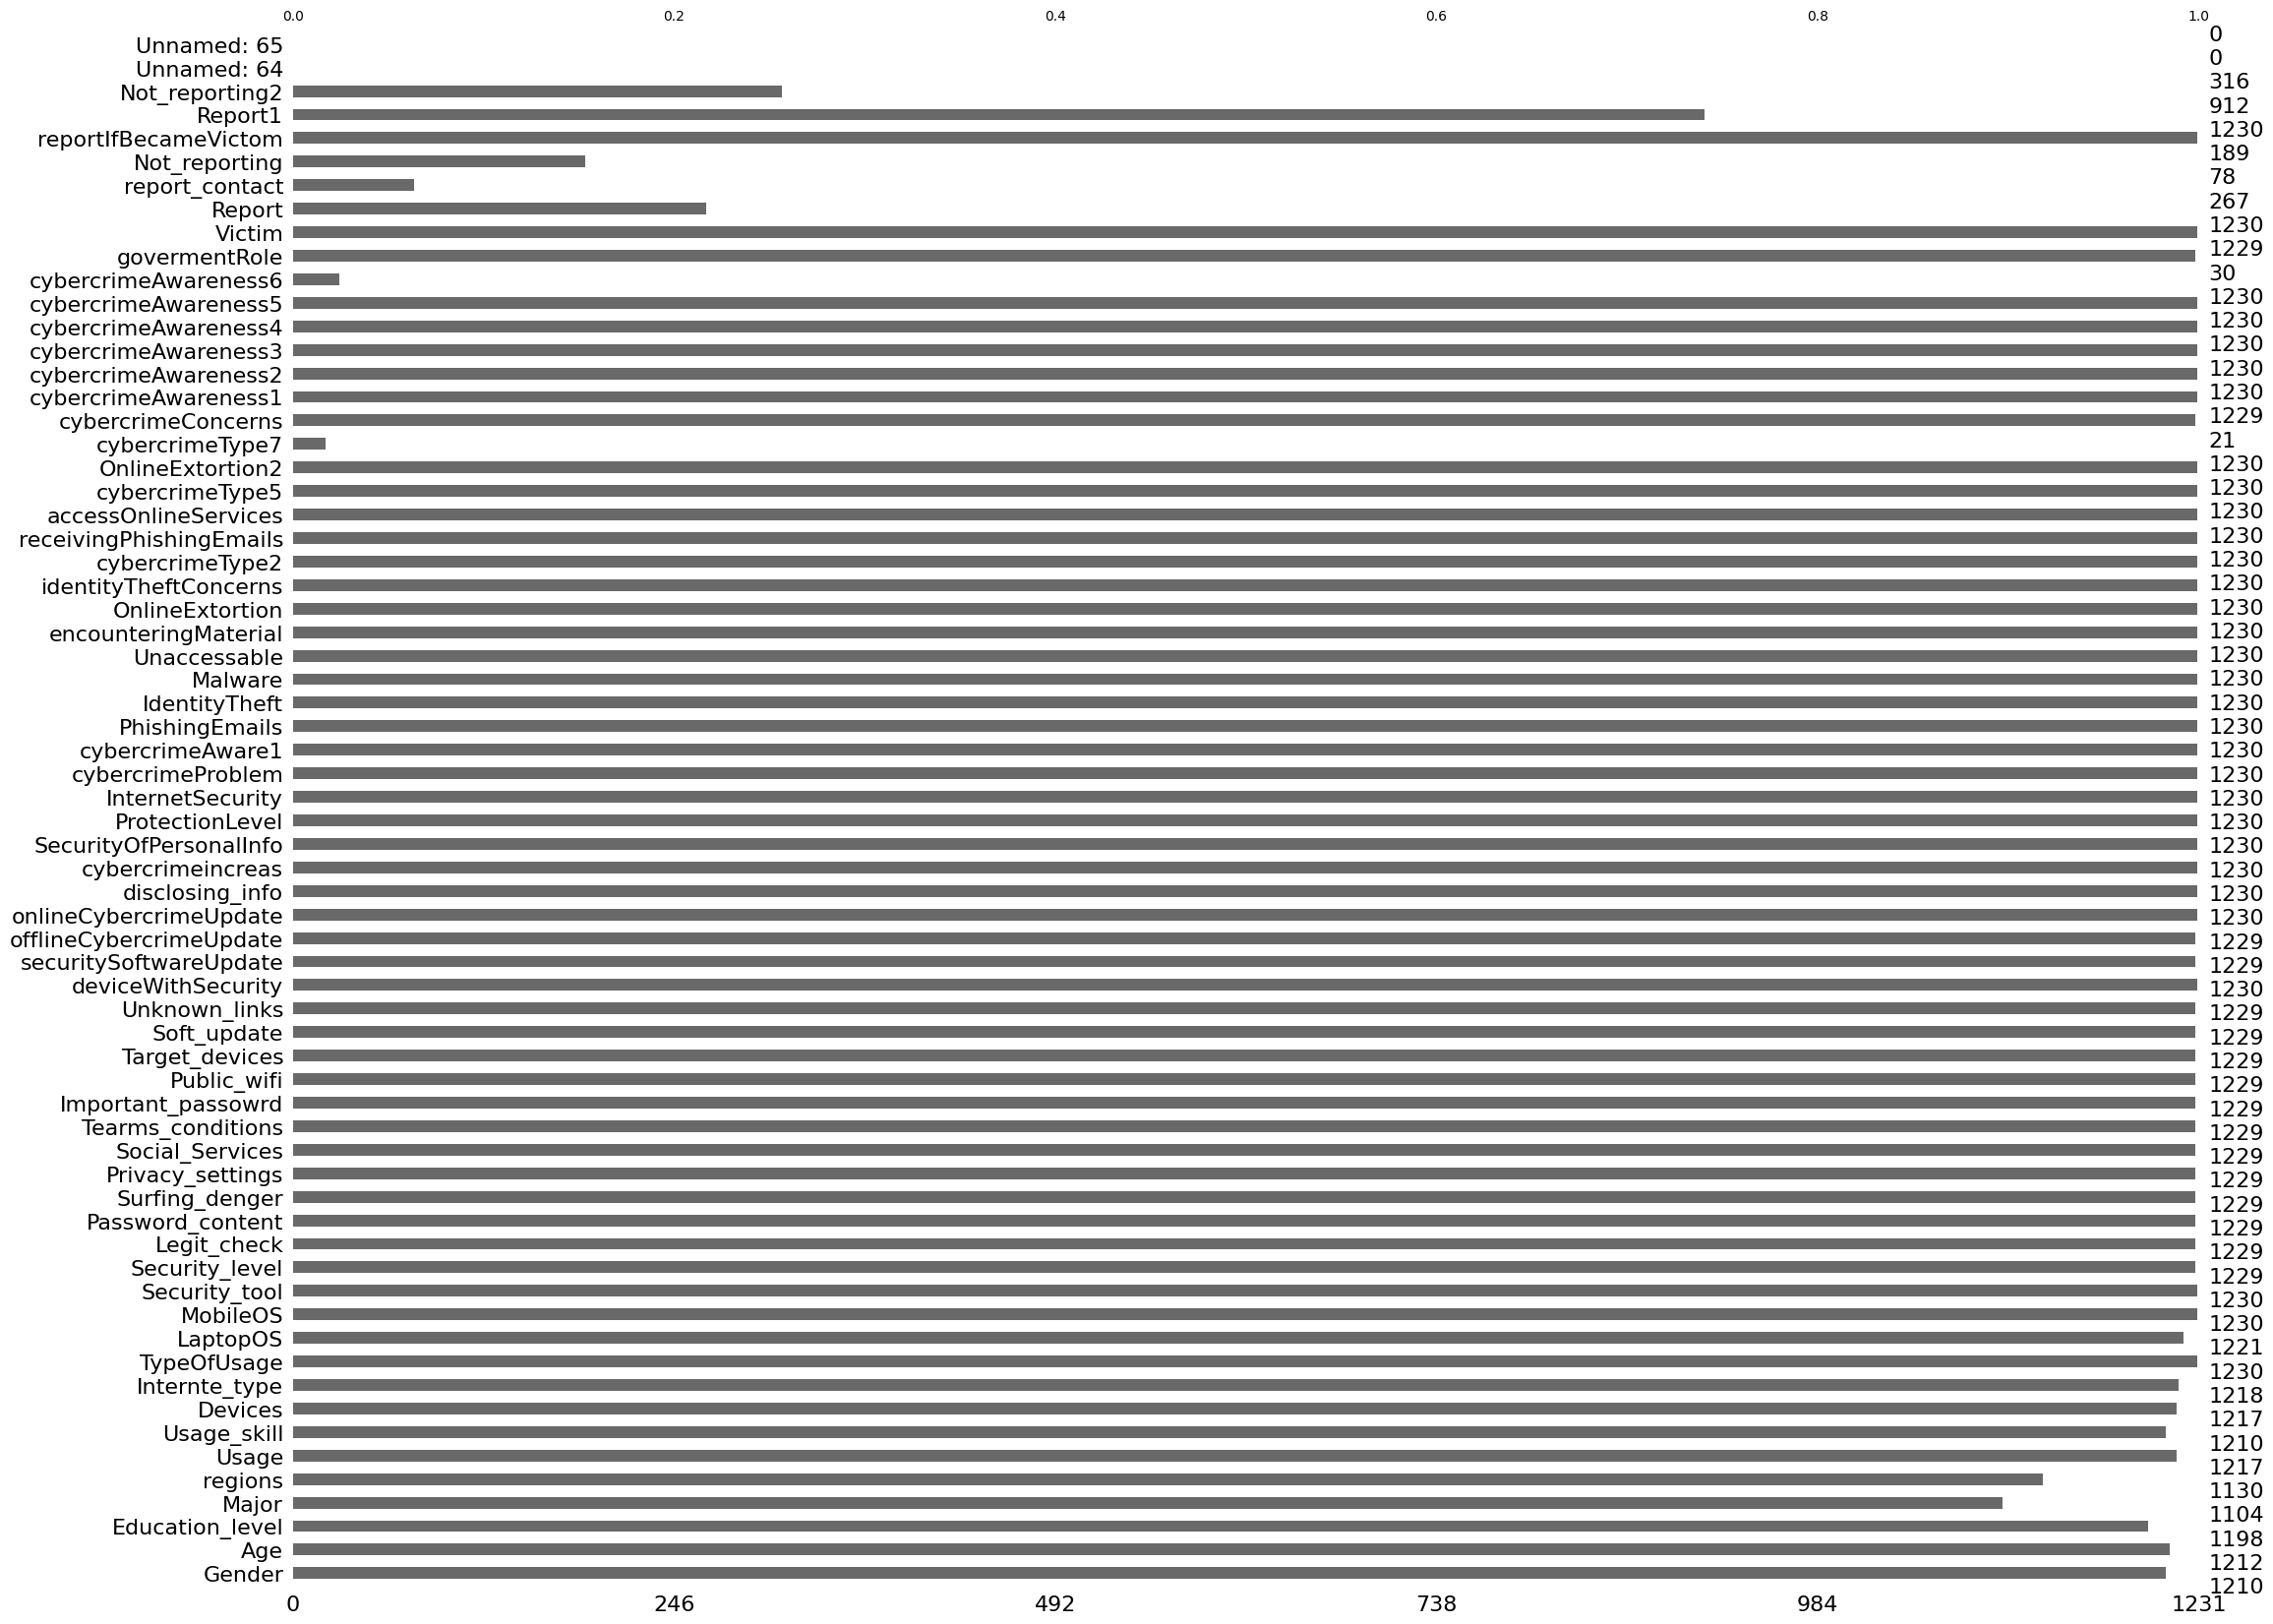

In [11]:
msno.bar(cyberWithMissing)

<Axes: >

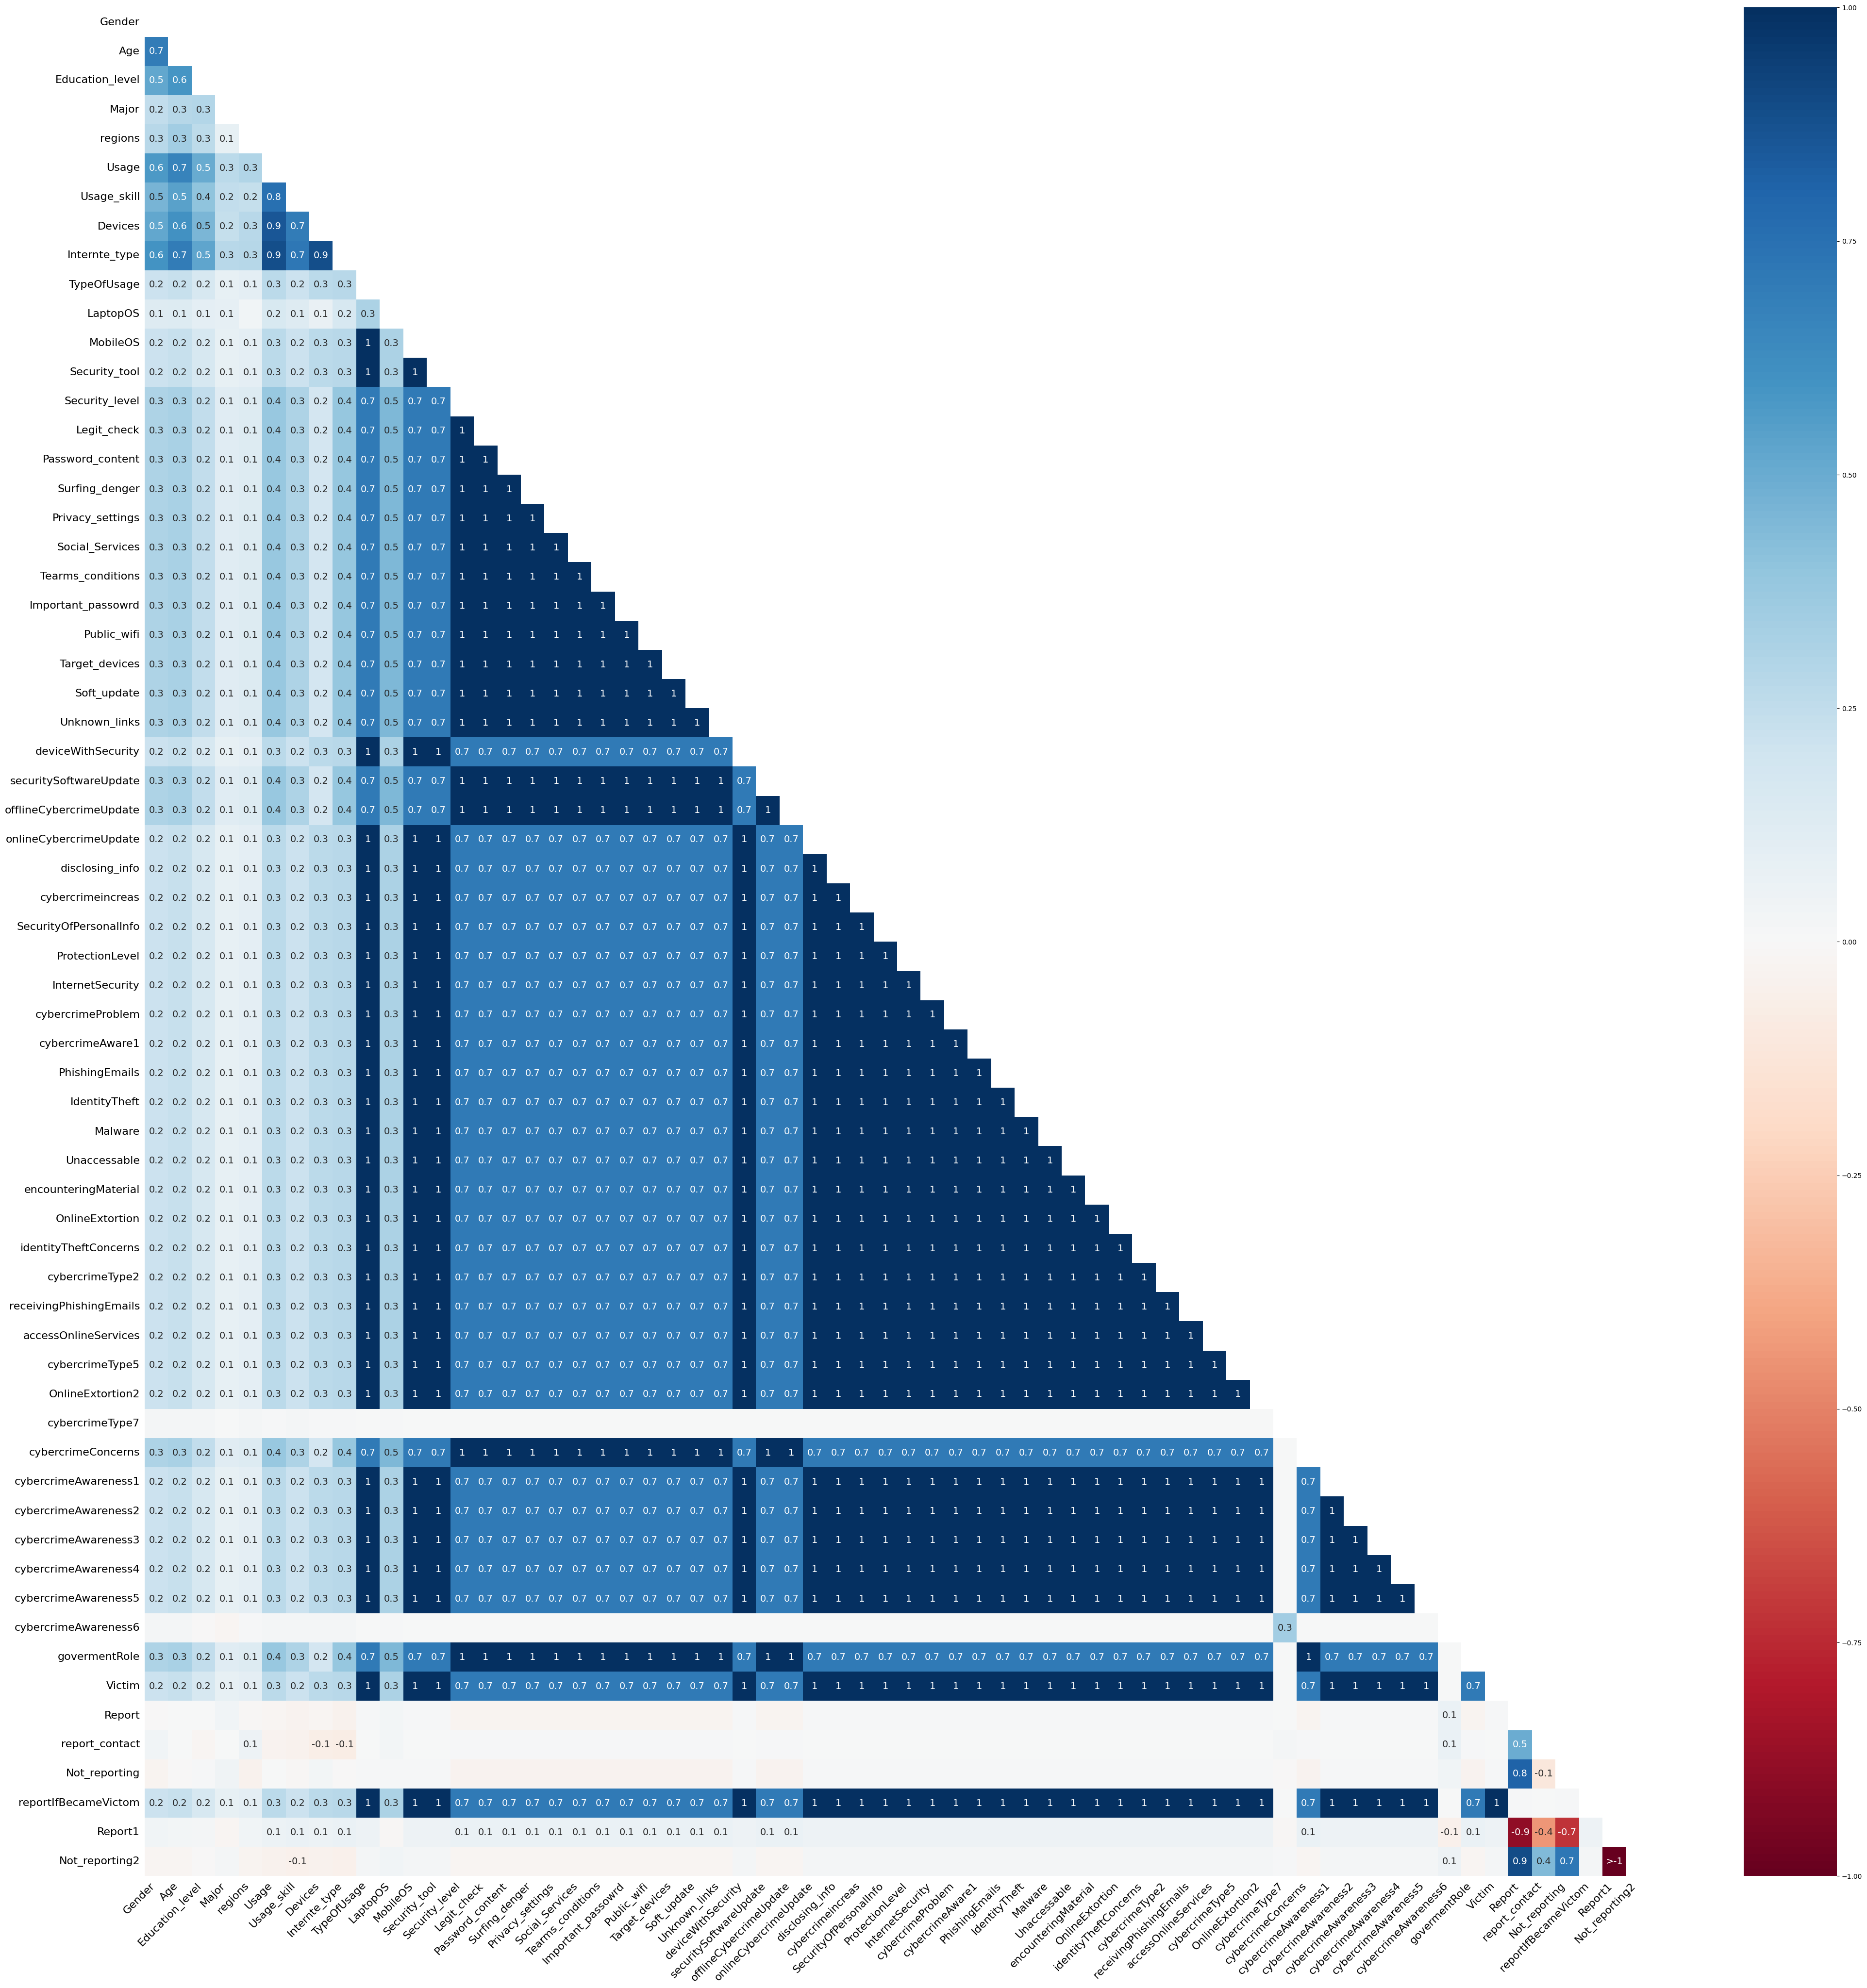

In [12]:
msno.heatmap(cyberWithMissing, figsize=(50, 50))

In [13]:
cyber=cyberWithMissing.drop(['Unnamed: 64', 'Unnamed: 65','cybercrimeType7','cybercrimeAwareness6','Report','report_contact','Not_reporting','Not_reporting2'], axis=1)
cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Gender                   1210 non-null   object
 1   Age                      1212 non-null   object
 2   Education_level          1198 non-null   object
 3   Major                    1104 non-null   object
 4   regions                  1130 non-null   object
 5   Usage                    1217 non-null   object
 6   Usage_skill              1210 non-null   object
 7   Devices                  1217 non-null   object
 8   Internte_type            1218 non-null   object
 9   TypeOfUsage              1230 non-null   object
 10  LaptopOS                 1221 non-null   object
 11  MobileOS                 1230 non-null   object
 12  Security_tool            1230 non-null   object
 13  Security_level           1229 non-null   object
 14  Legit_check              1229 non-null  

<Axes: >

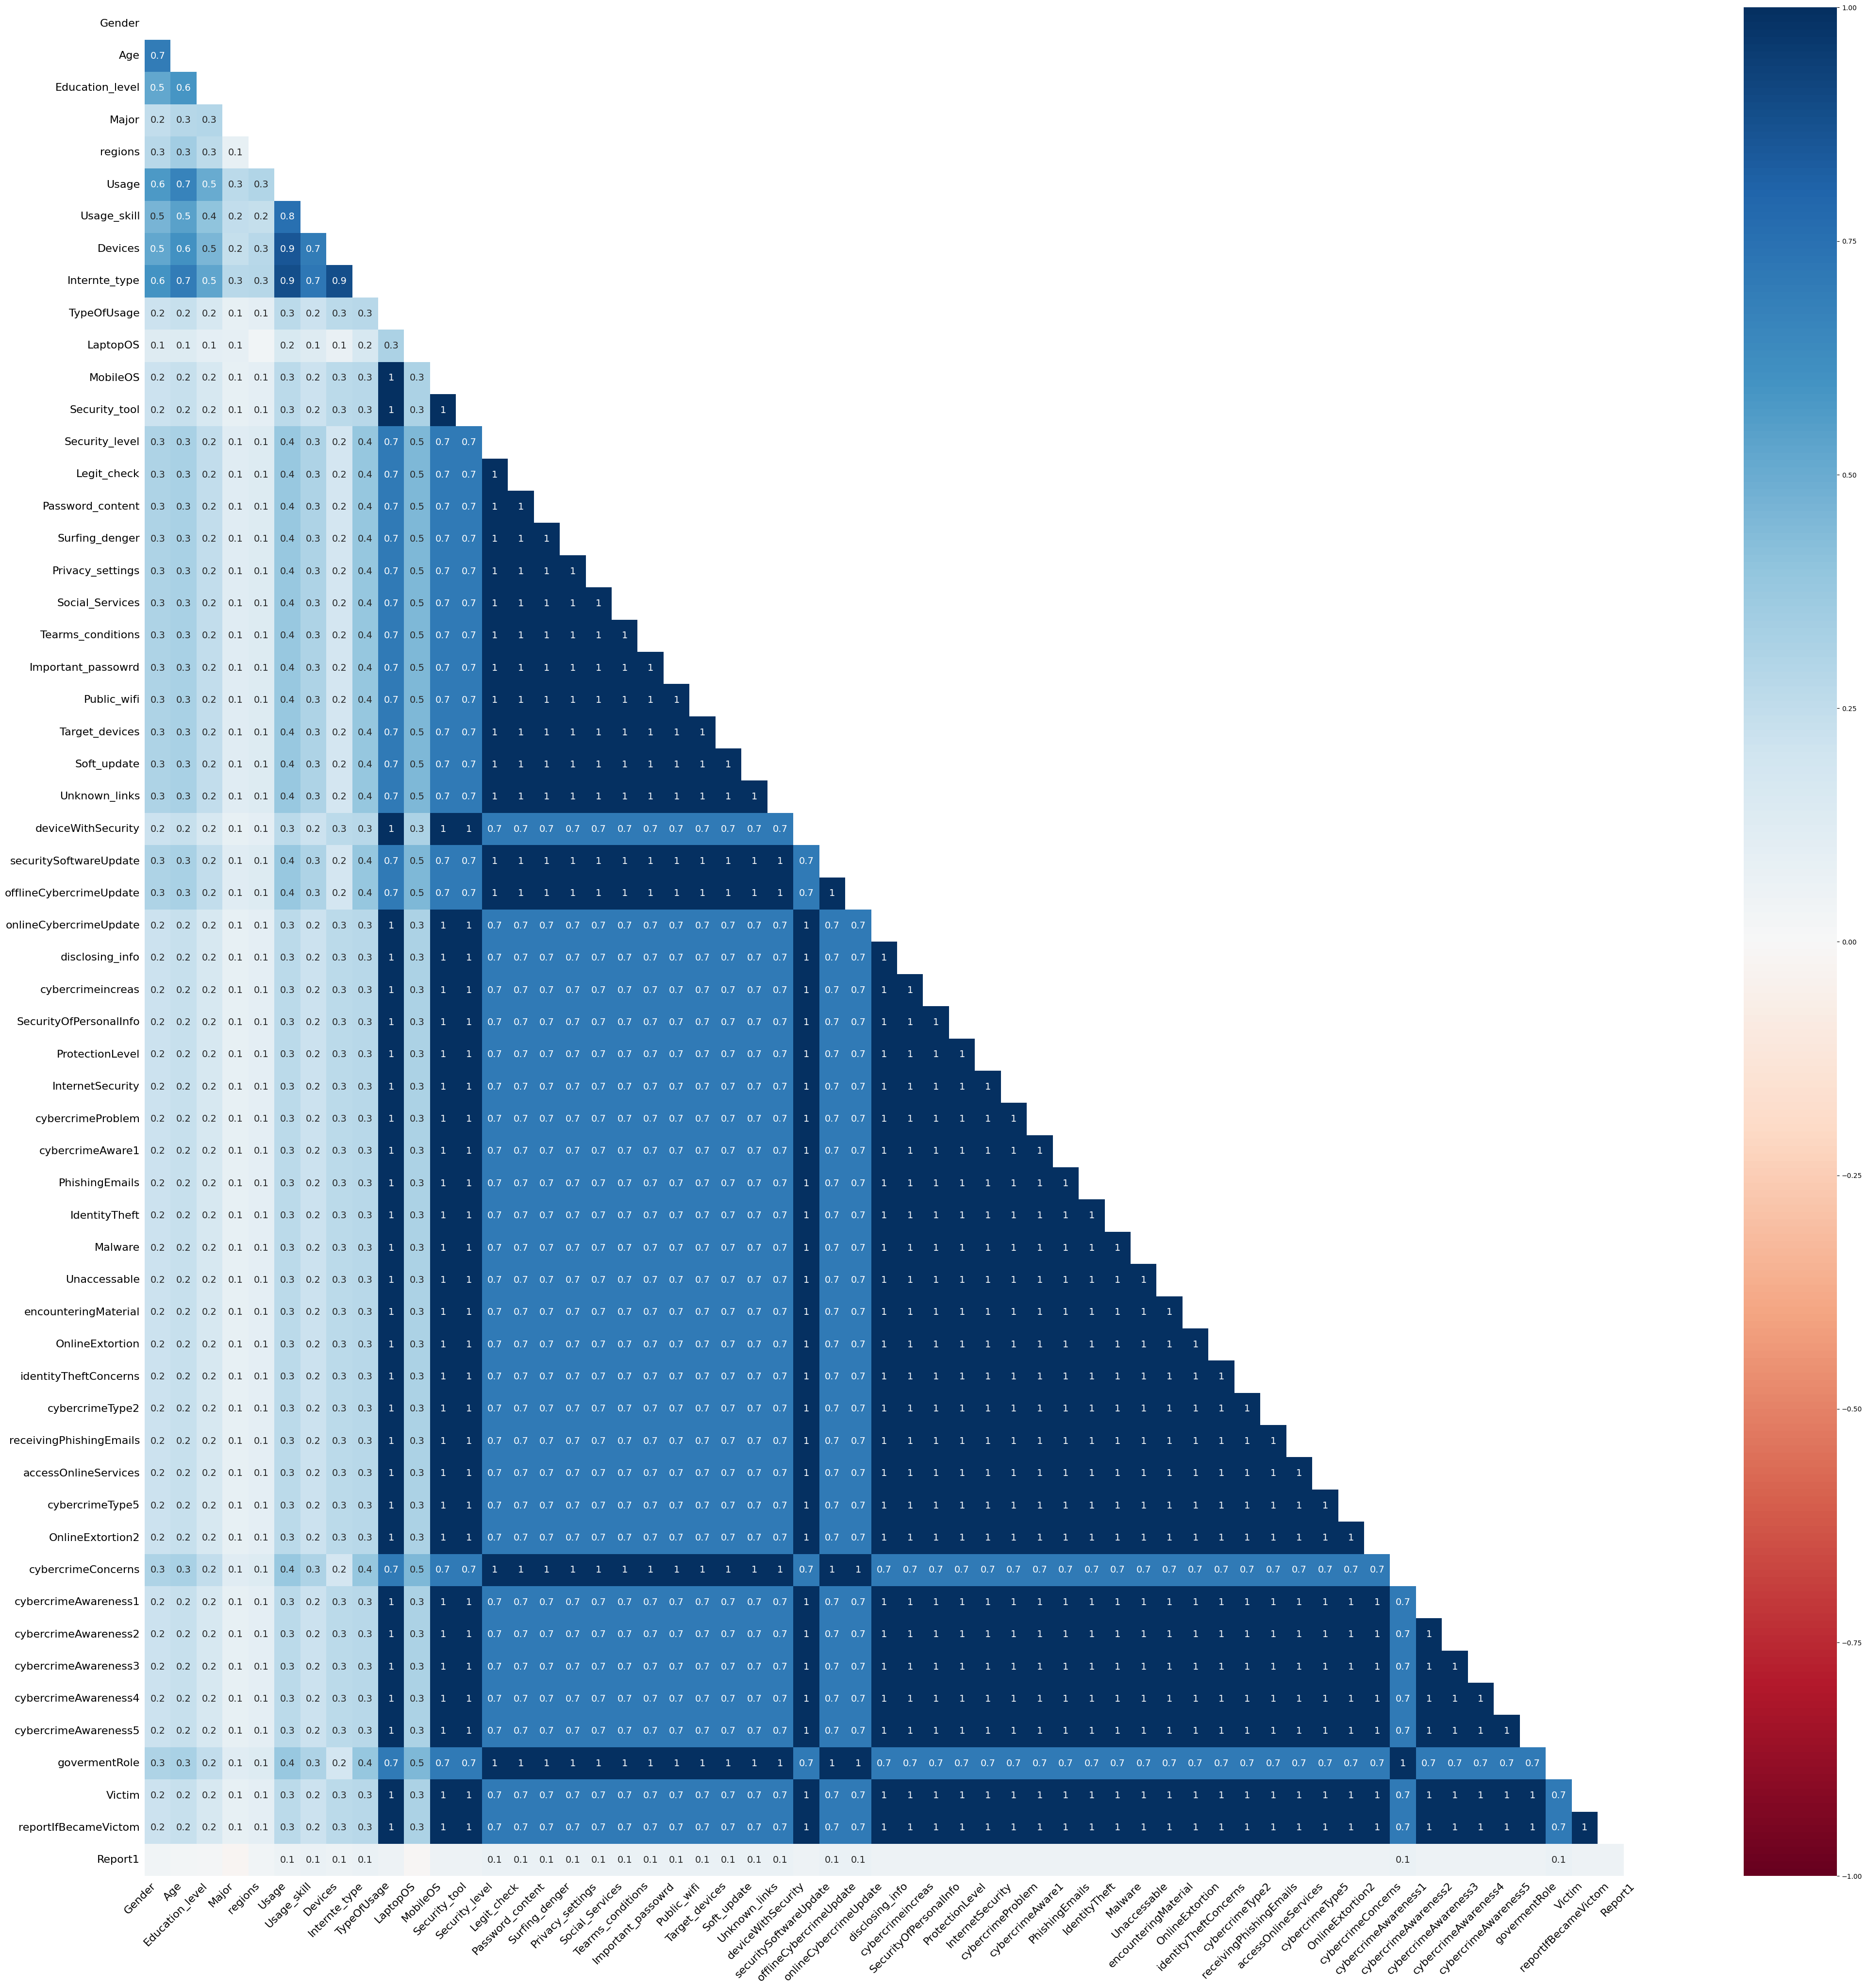

In [14]:
msno.heatmap(cyber, figsize=(50, 50))


<Axes: >

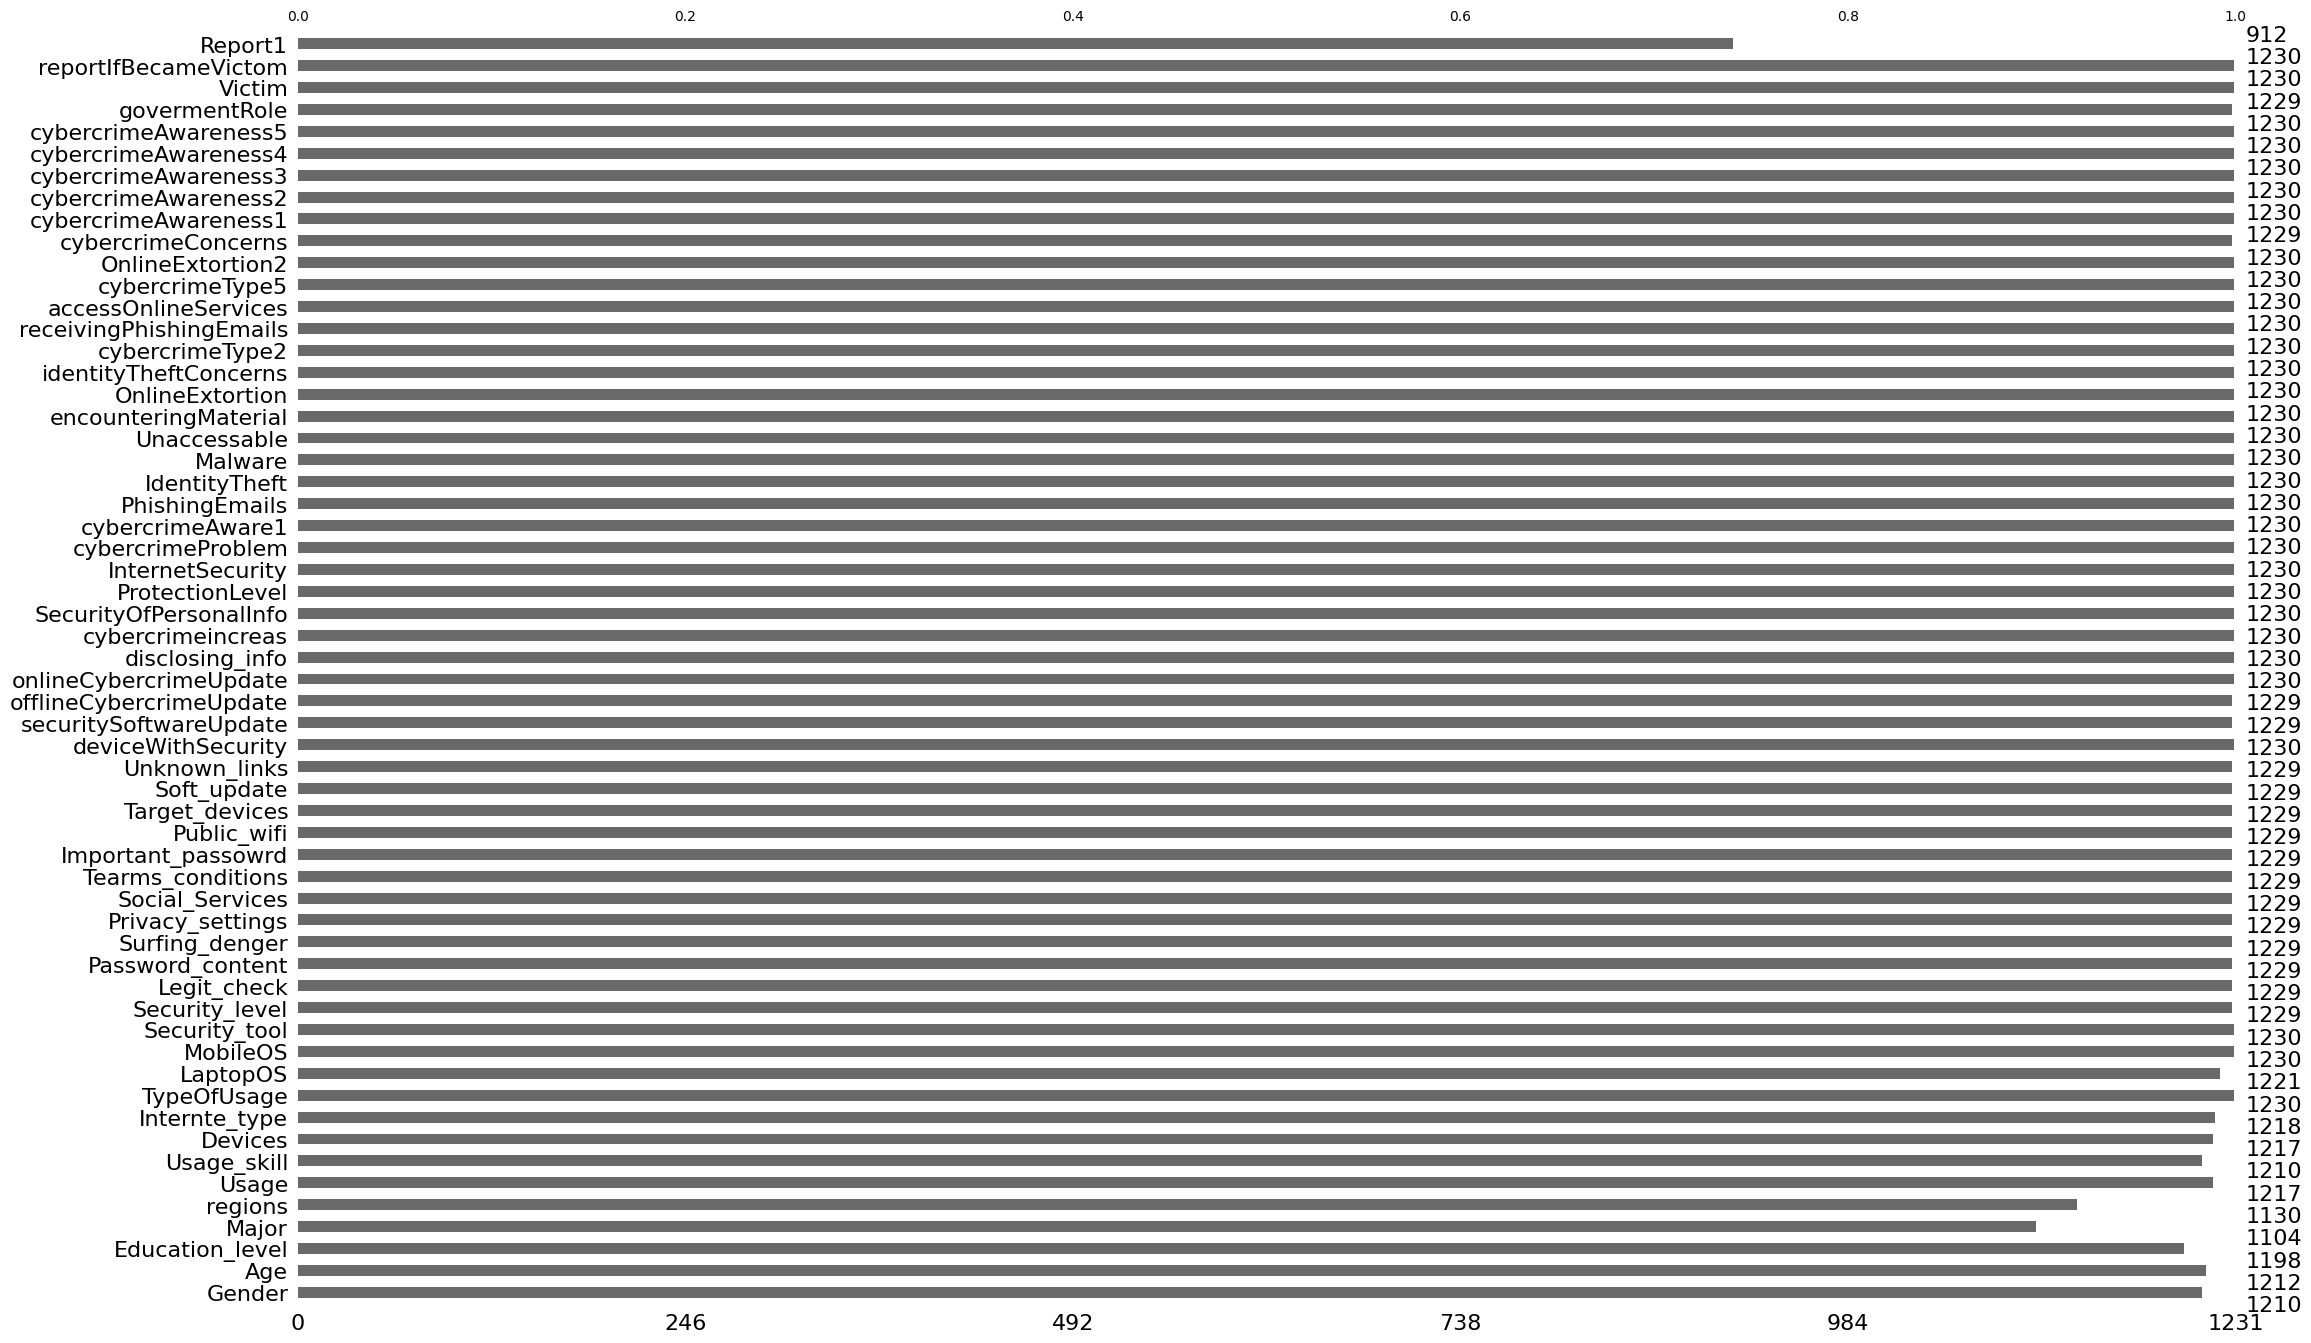

In [15]:
msno.bar(cyber)

In [16]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

In [17]:
cyber_obj = cyber.select_dtypes(include=['object'])

In [18]:
encoder = OrdinalEncoder()
cyber_obj_encoded = pd.DataFrame(encoder.fit_transform(cyber_obj), columns=cyber_obj.columns)

In [19]:
imputer = KNNImputer(n_neighbors=5)
cyber_obj_encoded_imputed=imputer.fit_transform(cyber_obj_encoded)

In [20]:
cyber_obj_imputed = pd.DataFrame(encoder.inverse_transform(cyber_obj_encoded_imputed), columns=cyber_obj.columns)


In [21]:
cyber_imputed = pd.concat([cyber_obj_imputed, cyber.select_dtypes(exclude=['object'])], axis=1)

In [22]:
cyber_imputed.to_csv('cybercrime_dataset_imputed.csv', index=False)


In [23]:
cyber_imp=pd.read_csv('/content/cybercrime_dataset_imputed.csv')

In [24]:
cyber_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Gender                   1231 non-null   object
 1   Age                      1231 non-null   object
 2   Education_level          1231 non-null   object
 3   Major                    1231 non-null   object
 4   regions                  1231 non-null   object
 5   Usage                    1231 non-null   object
 6   Usage_skill              1231 non-null   object
 7   Devices                  1231 non-null   object
 8   Internte_type            1231 non-null   object
 9   TypeOfUsage              1231 non-null   object
 10  LaptopOS                 1231 non-null   object
 11  MobileOS                 1231 non-null   object
 12  Security_tool            1231 non-null   object
 13  Security_level           1231 non-null   object
 14  Legit_check              1231 non-null  

In [25]:
cyber_imp = cyber_imp.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [26]:
cyber_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Gender                   1231 non-null   object
 1   Age                      1231 non-null   object
 2   Education_level          1231 non-null   object
 3   Major                    1231 non-null   object
 4   regions                  1231 non-null   object
 5   Usage                    1231 non-null   object
 6   Usage_skill              1231 non-null   object
 7   Devices                  1231 non-null   object
 8   Internte_type            1231 non-null   object
 9   TypeOfUsage              1231 non-null   object
 10  LaptopOS                 1231 non-null   object
 11  MobileOS                 1231 non-null   object
 12  Security_tool            1231 non-null   object
 13  Security_level           1231 non-null   object
 14  Legit_check              1231 non-null  

In [27]:
import re

In [28]:
pattern = "^\s+"
replacement = ""
cyber_imp = cyber_imp.applymap(lambda x: re.sub(pattern, replacement, x))

In [29]:
pattern = "\s+"
replacement = " "
cyber_imp = cyber_imp.applymap(lambda x: re.sub(pattern, replacement, x))

### **Data Analysis**

<Axes: >

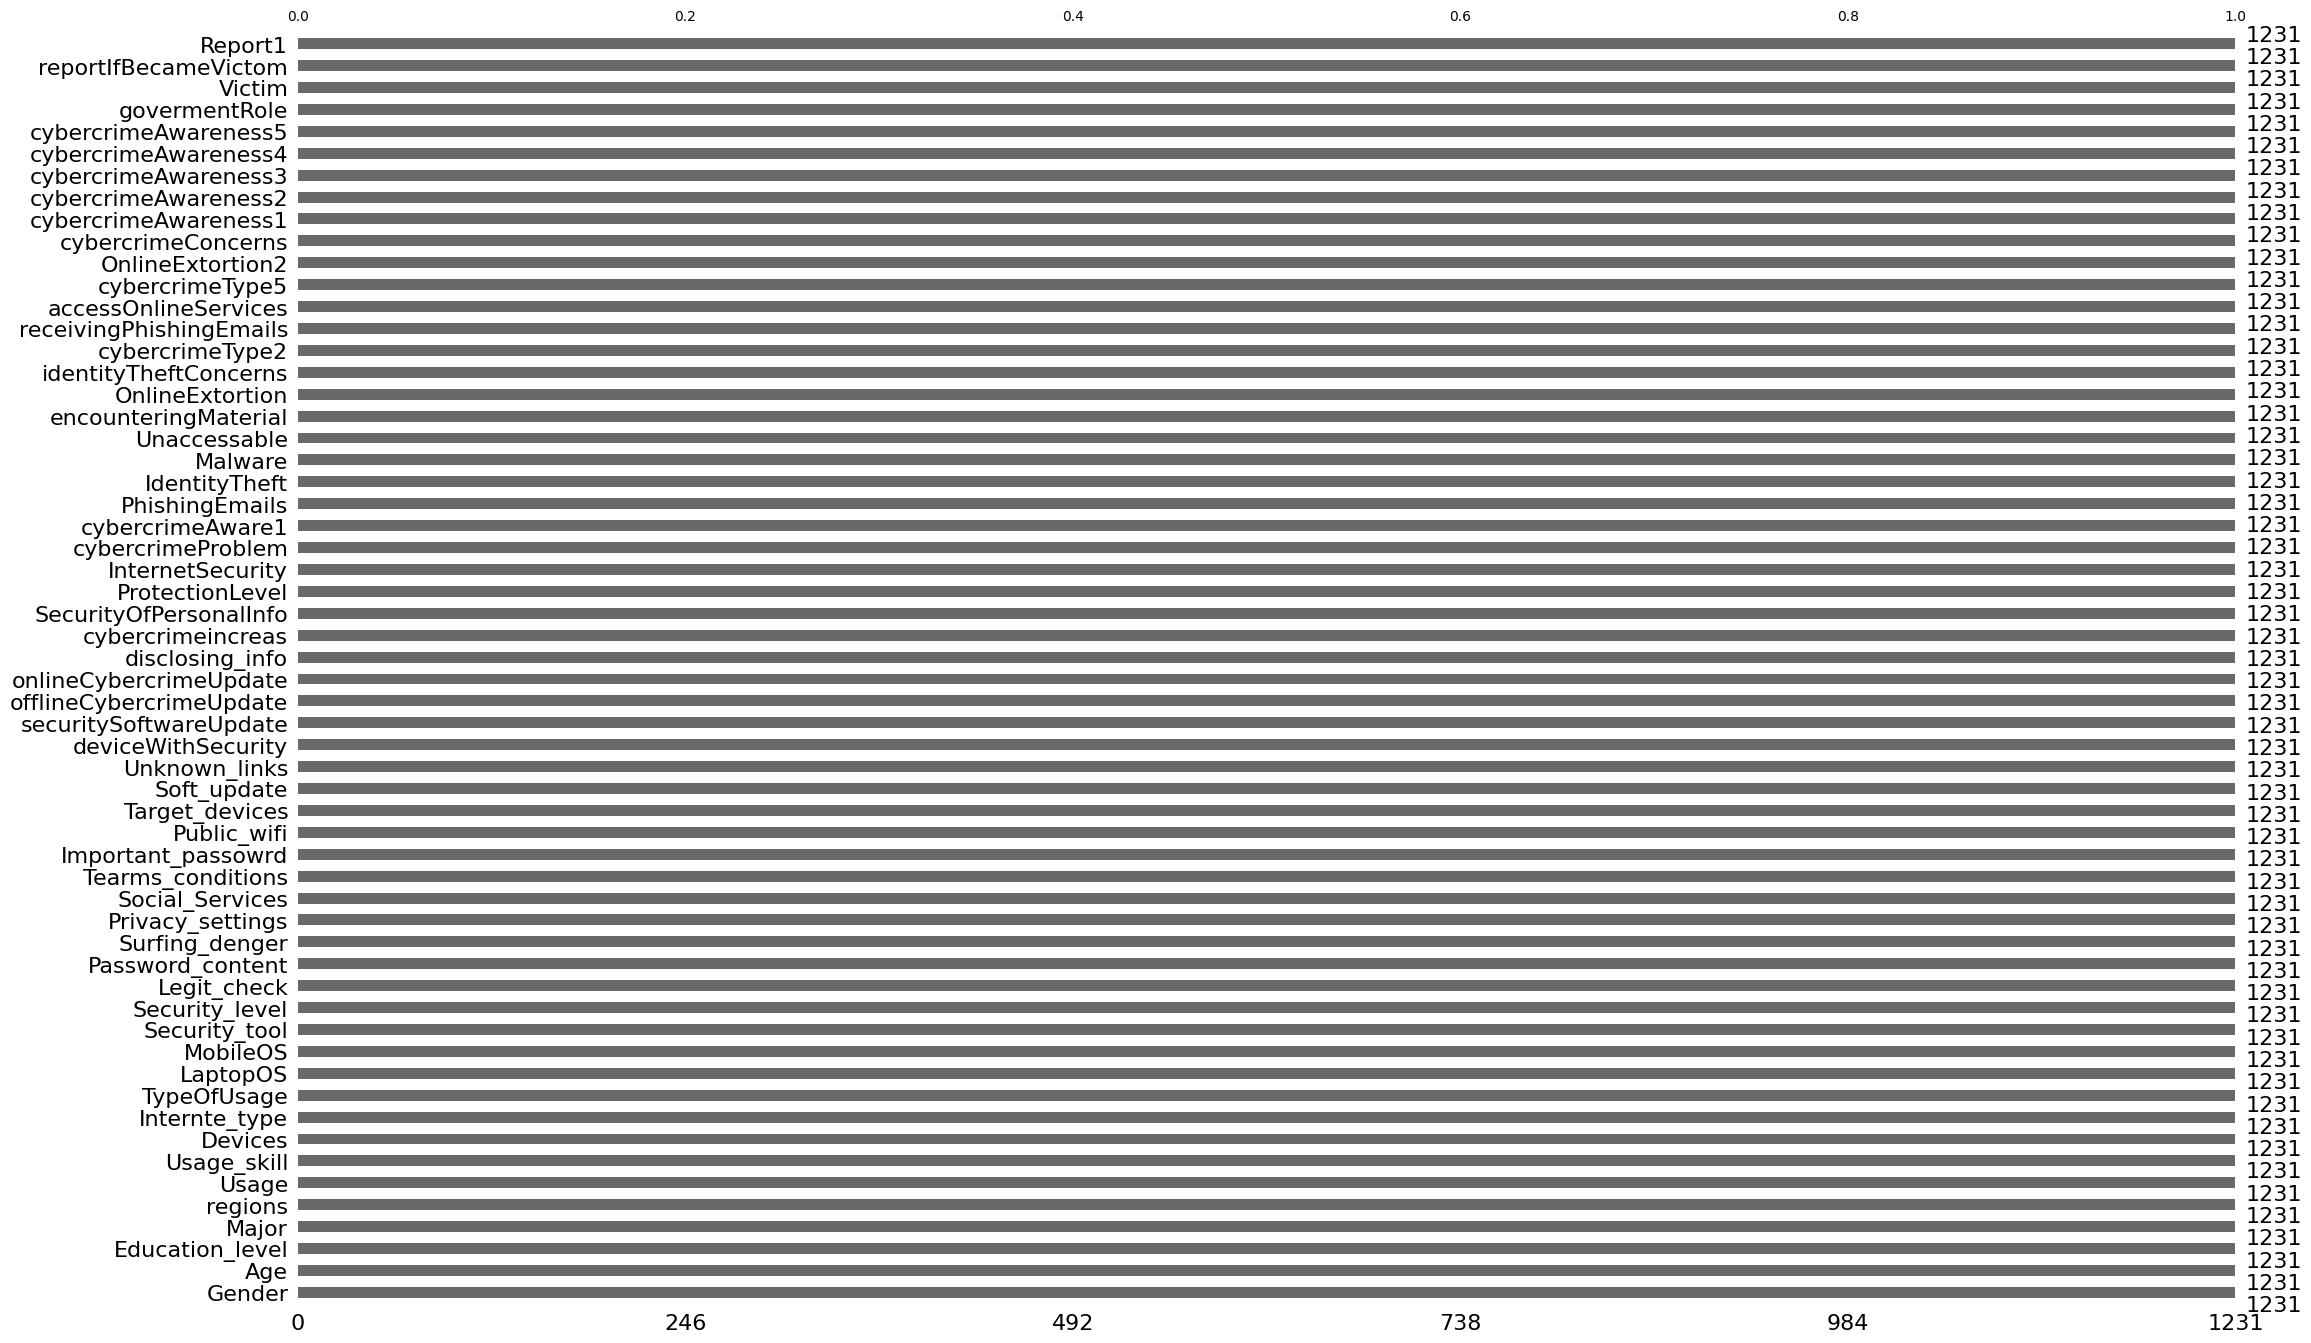

In [30]:
msno.bar(cyber_imp)

In [31]:
cyber_imp

Gender    Age               Education_level                      Major  \
0     Female  18-29  Postgraduate (Master’s, PhD)           Computer Science   
1     Female  18-29  Undergraduate (Diploma, BSc)  Medicine or public health   
2     Female  18-29  Undergraduate (Diploma, BSc)  Medicine or public health   
3     Female  18-29  Undergraduate (Diploma, BSc)  Medicine or public health   
4       Male  18-29  Undergraduate (Diploma, BSc)                Engineering   
...      ...    ...                           ...                        ...   
1226    Male  18-29  Undergraduate (Diploma, BSc)                Engineering   
1227    Male  18-29  Undergraduate (Diploma, BSc)                Engineering   
1228    Male  18-29  Undergraduate (Diploma, BSc)                Engineering   
1229    Male  18-29  Undergraduate (Diploma, BSc)                Engineering   
1230  Female  18-29  Postgraduate (Master’s, PhD)      Environmental Science   

     regions                          Usage  \
0      Jazan  Frequently throughout the day   
1     Madina  Frequently throughout the day   
2     Makkah  Frequently throughout the day   
3     Makkah  Frequently throughout the day   
4      Ha'il  Frequently throughout the day   
...      ...                            ...   
1226  Makkah  Frequently throughout the day   
1227  Makkah  Frequently throughout the day   
1228  Makkah  Frequently throughout the day   
1229  Makkah  Frequently throughout the day   
1230  Madina  Frequently throughout the day   

                                            Usage_skill  \
0     Intermediate (e.g. able to install and run spe...   
1     Intermediate (e.g. able to install and run spe...   
2     Intermediate (e.g. able to install and run spe...   
3     Intermediate (e.g. able to install and run spe...   
4     Intermediate (e.g. able to install and run spe...   
...                                                 ...   
1226  Beginner/Basic (e.g. start computer and phone,...   
1227  Intermediate (e.g. able to install and run spe...   
1228  Intermediate (e.g. able to install and run spe...   
1229  Intermediate (e.g. able to install and run spe...   
1230  Expert (e.g. computer engineering, database ad...   

                          Devices  \
0     Desktop, Laptop, Smartphone   
1                      Smartphone   
2                          Tablet   
3              Laptop, Smartphone   
4     Desktop, Laptop, Smartphone   
...                           ...   
1226                   Smartphone   
1227           Laptop, Smartphone   
1228                   Smartphone   
1229                   Smartphone   
1230  Desktop, Smartphone, Tablet   

                                          Internte_type  \
0            Mobile/cellular phone network (e.g. 3G/4G)   
1     Private Wi-Fi (e.g. in your home), Mobile/cell...   
2            Mobile/cellular phone network (e.g. 3G/4G)   
3     Public Wi-Fi (e.g. in coffee shop), Private Wi...   
4     Private Wi-Fi (e.g. in your home), Mobile/cell...   
...                                                 ...   
1226         Mobile/cellular phone network (e.g. 3G/4G)   
1227         Mobile/cellular phone network (e.g. 3G/4G)   
1228         Mobile/cellular phone network (e.g. 3G/4G)   
1229  Mobile/cellular phone network (e.g. 3G/4G), Pr...   
1230                  Private Wi-Fi (e.g. in your home)   

                                            TypeOfUsage  \
0     Education, Social networks, Online services, C...   
1                        Social networks, Communication   
2     Education, Social networks, Online services, C...   
3     Professional reasons, Education, Social networ...   
4     Education, Social networks, Online services, E...   
...                                                 ...   
1226  Education, Social networks, Online services, E...   
1227  Professional reasons , Education, Social netwo...   
1228  Social networks , Online services , Entertainment   
1229  Social networks , Onl

In [32]:
for x in cyber_imp.columns:
    
    crosstab = pd.crosstab(index=cyber_imp[x], columns='count')

    print(crosstab)
    print ('_____________________________________')
   

col_0   count
Gender       
Female    737
Male      494
_____________________________________
col_0  count
Age         
18-29    665
30-39    322
40-49    185
50+       59
_____________________________________
col_0                         count
Education_level                    
High School                     152
Middle School                     7
Postgraduate (Master’s, PhD)    217
Undergraduate (Diploma, BSc)    855
_____________________________________
col_0                           count
Major                                
Actuarial Science                   1
Administrative Sciences             1
Applied math                        1
Applied science                     1
Arabic Language                    16
Arts                                2
Automotaive Mechanics               1
Aviation                            1
Biology                             8
Biotechnology                       1
Business Administration            59
Chemistry                           1
Chem

In [33]:
victim = pd.crosstab(index=cyber_imp['Victim'], columns='count')
percentage = victim / victim.sum() * 100

print(percentage)

col_0       count
Victim           
No      78.310317
Yes     21.689683


In [34]:
ages = pd.crosstab(index=cyber_imp['Gender'], columns=cyber_imp['Age'], margins = True)
ages.index = ['Female','Male','column total']
ages.columns=['18-29','30-39','40-49','50+','row_total']
ages

18-29  30-39  40-49  50+  row_total
Female          483    163     78   13        737
Male            182    159    107   46        494
column total    665    322    185   59       1231

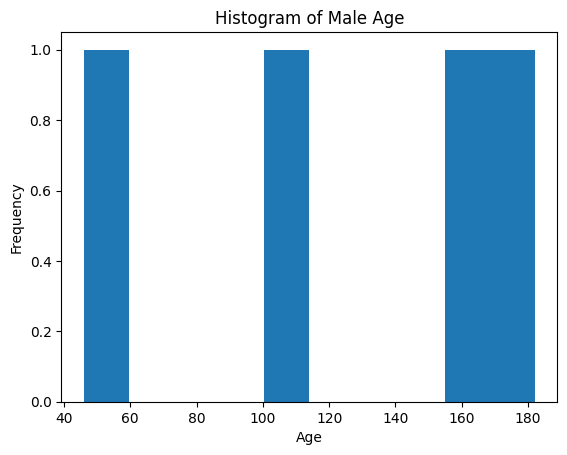

In [35]:
ages = pd.crosstab(index=cyber_imp['Gender'], columns=cyber_imp['Age'])
male_age = ages.loc['Male']
male_age.plot.hist(bins=10)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Male Age')

plt.show()


In [36]:
vic = pd.crosstab(index=cyber_imp['Gender'], columns=cyber_imp['Victim'], margins = True)
vic.index = ['Female','Male','column total']
vic.columns=['No','Yes','row_total']
vic/vic.loc['column total','row_total']

No       Yes  row_total
Female        0.467100  0.131600     0.5987
Male          0.316003  0.085297     0.4013
column total  0.783103  0.216897     1.0000

array([<Axes: ylabel='No'>, <Axes: ylabel='Yes'>], dtype=object)

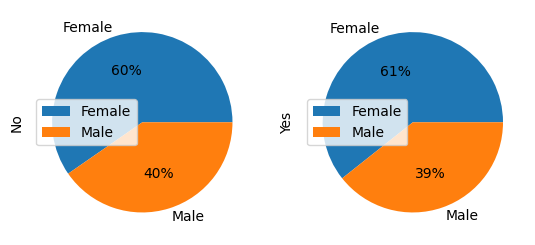

In [37]:
vic = pd.crosstab(index=cyber_imp['Gender'], columns=cyber_imp['Victim'])
vic.index = ['Female','Male']
vic.columns=['No','Yes']
vic.plot(kind='pie',autopct='%.0f%%', subplots=True)

In [38]:
vic_age= cyber_imp.groupby(['Age']).Victim.value_counts(normalize = True)
vic_age_gen=vic_age.unstack()
vic_age_gen

Victim        No       Yes
Age                       
18-29   0.796992  0.203008
30-39   0.785714  0.214286
40-49   0.735135  0.264865
50+     0.762712  0.237288

<Axes: xlabel='Age'>

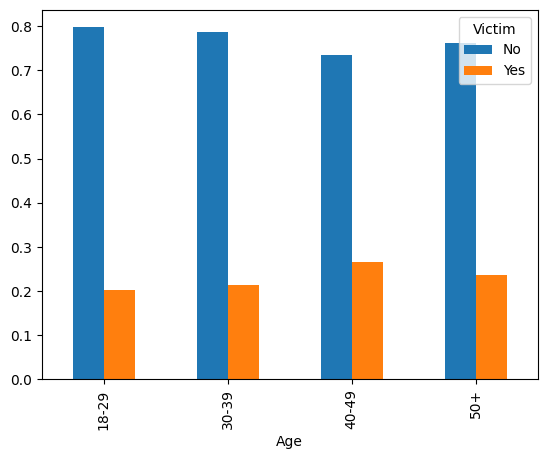

In [39]:
vic_age_gen.plot(kind='bar')

In [40]:
education_age= cyber_imp.groupby(['Education_level','Gender']).Victim.value_counts(normalize = True)
education_age_gen=education_age.unstack()
education_age_gen


Victim                                     No       Yes
Education_level              Gender                    
High School                  Female  0.875000  0.125000
                             Male    0.819444  0.180556
Middle School                Female  0.800000  0.200000
                             Male    0.500000  0.500000
Postgraduate (Master’s, PhD) Female  0.720000  0.280000
                             Male    0.717949  0.282051
Undergraduate (Diploma, BSc) Female  0.777174  0.222826
                             Male    0.808581  0.191419

<Axes: xlabel='Education_level,Gender'>

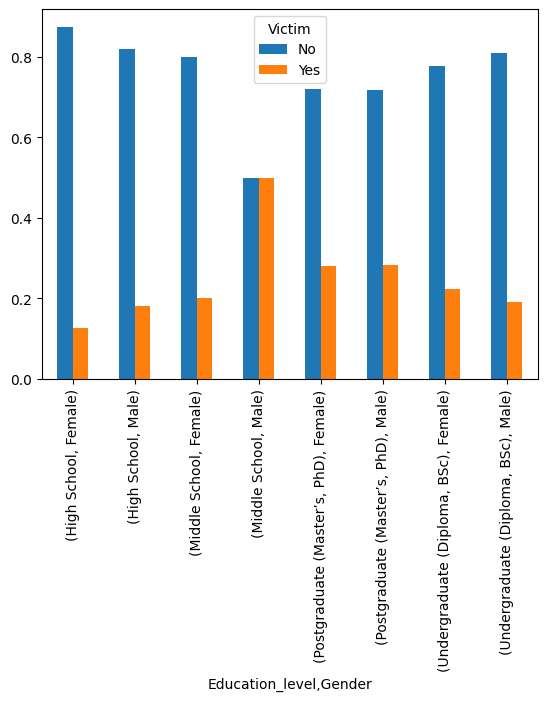

In [41]:
education_age= cyber_imp.groupby(['Education_level','Gender']).Victim.value_counts(normalize = True)
education_age_gen=education_age.unstack()
education_age_gen
education_age_gen.plot(kind='bar')

In [42]:
device= cyber_imp.groupby(['Devices','Gender']).Victim.value_counts(normalize = True)
device=device.unstack()
device

Victim                                                           No       Yes
Devices                                            Gender                    
Desktop                                            Female  0.857143  0.142857
                                                   Male    0.833333  0.166667
Desktop, Laptop                                    Female  1.000000       NaN
                                                   Male    1.000000       NaN
Desktop, Laptop, Smartphone                        Female  0.814815  0.185185
                                                   Male    0.721311  0.278689
Desktop, Laptop, Smartphone, Tablet                Female  0.705882  0.294118
                                                   Male    0.755102  0.244898
Desktop, Laptop, Smartphone, Tablet, AppleTV       Female  1.000000       NaN
                                                   Male         NaN  1.000000
Desktop, Laptop, Smartphone, Tablet, AppleTV,Sm... Male    1.000000       NaN
Desktop, Laptop, Smartphone, Tablet, Smart watch   Female  0.500000  0.500000
Desktop, Smartphone                                Female  0.750000  0.250000
                                                   Male    0.842105  0.157895
Desktop, Smartphone, Tablet                        Female  0.800000  0.200000
                                                   Male    0.857143  0.142857
Laptop                                             Female  0.828571  0.171429
                                                   Male    0.800000  0.200000
Laptop, Smartphone                                 Female  0.769634  0.230366
                                                   Male    0.711538  0.288462
Laptop, Smartphone, Smartwatch                     Male    1.000000       NaN
Laptop, Smartphone, Tablet                         Female  0.735294  0.264706
                                                   Male    0.875000  0.125000
Laptop, Tablet                                     Female  1.000000       NaN
                                                   Male    0.666667  0.333333
Smartphone                                         Female  0.793210  0.206790
                                                   Male    0.850575  0.149425
Smartphone, Tablet                                 Female  0.809524  0.190476
                                                   Male    0.666667  0.333333
Tablet                                             Female  0.727273  0.272727
                                                   Male    0.333333  0.666667

In [43]:
device2= cyber_imp.groupby(['Devices','Education_level']).Victim.value_counts(normalize = True)
device2=device2.unstack()
device2

Victim                                                                                 No  \
Devices                                            Education_level                          
Desktop                                            High School                   1.000000   
                                                   Postgraduate (Master’s, PhD)  1.000000   
                                                   Undergraduate (Diploma, BSc)  0.800000   
Desktop, Laptop                                    Postgraduate (Master’s, PhD)  1.000000   
                                                   Undergraduate (Diploma, BSc)  1.000000   
Desktop, Laptop, Smartphone                        High School                   1.000000   
                                                   Postgraduate (Master’s, PhD)  0.820513   
                                                   Undergraduate (Diploma, BSc)  0.687500   
Desktop, Laptop, Smartphone, Tablet                High School                   1.000000   
                                                   Postgraduate (Master’s, PhD)  0.714286   
                                                   Undergraduate (Diploma, BSc)  0.692308   
Desktop, Laptop, Smartphone, Tablet, AppleTV       Postgraduate (Master’s, PhD)  0.500000   
Desktop, Laptop, Smartphone, Tablet, AppleTV,Sm... Undergraduate (Diploma, BSc)  1.000000   
Desktop, Laptop, Smartphone, Tablet, Smart watch   Middle School                      NaN   
                                                   Undergraduate (Diploma, BSc)  1.000000   
Desktop, Smartphone                                High School                   0.800000   
                                                   Postgraduate (Master’s, PhD)  1.000000   
                                                   Undergraduate (Diploma, BSc)  0.769231   
Desktop, Smartphone, Tablet                        Postgraduate (Master’s, PhD)  0.800000   
                                                   Undergraduate (Diploma, BSc)  0.857143   
Laptop                                             High School                   1.000000   
                                                   Postgraduate (Master’s, PhD)  0.857143   
                                                   Undergraduate (Diploma, BSc)  0.783784   
Laptop, Smartphone                                 High School                   0.714286   
                                                   Postgraduate (Master’s, PhD)  0.575758   
                                                   Undergraduate (Diploma, BSc)  0.804651   
Laptop, Smartphone, Smartwatch                     Undergraduate (Diploma, BSc)  1.000000   
Laptop, Smartphone, Tablet                         High School                   0.857143   
                                                   Postgraduate (Master’s, PhD)  0.714286   
                                                   Undergraduate (Diploma, BSc)  0.774648   
Laptop, Tablet                                     Undergraduate (Diploma, BSc)  0.800000   
Smartphone                                         High School                   0.864583   
                                                   Middle School                 0.800000   
                                                   Postgraduate (Master’s, PhD)  0.774194   
                                                   Undergraduate (Diploma, BSc)  0.803279   
Smartphone, Tablet                                 High School                   0.666667   
                                                   Postgraduate (Master’s, PhD)  0.500000   
                                                   Undergraduate (Diploma, BSc)  0.842105   
Tablet                                             High School                   0.500000   
                                                   Middle School                 1.000000   
                                                   Postgraduate (Master’s, PhD)  0.666667   
 

In [44]:
UsageSkill= cyber_imp.groupby(['Devices','Usage']).Usage_skill.value_counts(normalize = True)
UsageSkill=UsageSkill.unstack()
UsageSkill

Usage_skill                                                                                   Beginner/Basic (e.g. start computer and phone, go to specified web page. Use Word. Use social media)  \
Devices                                            Usage                                                                                                                                             
Desktop                                            Frequently throughout the day                                                       0.200000                                                      
                                                   Less frequently (once a week, once month)                                                NaN                                                      
                                                   Once or twice a day                                                                      NaN                                                      
Desktop, Laptop                                    Frequently throughout the day                                                       0.500000                                                      
Desktop, Laptop, Smartphone                        Frequently throughout the day                                                       0.060241                                                      
                                                   Once or twice a day                                                                      NaN                                                      
Desktop, Laptop, Smartphone, Tablet                Frequently throughout the day                                                       0.086420                                                      
                                                   Once or twice a day                                                                      NaN                                                      
Desktop, Laptop, Smartphone, Tablet, AppleTV       Frequently throughout the day                                                            NaN                                                      
Desktop, Laptop, Smartphone, Tablet, AppleTV,Sm... Frequently throughout the day                                                            NaN                                                      
Desktop, Laptop, Smartphone, Tablet, Smart watch   Frequently throughout the day                                                            NaN                                                      
                                                   Less frequently (once a week, once month)                                           1.000000                                                      
Desktop, Smartphone                                Frequently throughout the day                                                       0.170732                                                      
                                                   Once or twice a day                                                                 0.600000                                                      
Desktop, Smartphone, Tablet                        Frequently throughout the day                                                       0.090909                                                      
                                                   Once or twice a day                                                                      NaN                                                      
Laptop                                             Frequently throughout the day                                                       0.325000                                                      
                                                   Less frequently (once a week, once month)                                                NaN                                                      
                                        

In [45]:
sec_lev= cyber_imp.groupby(['Gender','Security_level']).Victim.value_counts(normalize = True)
sec_lev=sec_lev.unstack()
sec_lev

Victim                                          No       Yes
Gender Security_level                                       
Female Neutral                            0.764706  0.235294
       Not secure at all                  1.000000       NaN
       Not sure (difficult to determine)  0.806122  0.193878
       Somewhat insecure                  0.703704  0.296296
       Somewhat secure                    0.751323  0.248677
       Very secure                        0.838889  0.161111
Male   Neutral                            0.717391  0.282609
       Not secure at all                  0.800000  0.200000
       Not sure (difficult to determine)  0.803922  0.196078
       Somewhat insecure                  0.750000  0.250000
       Somewhat secure                    0.780303  0.219697
       Very secure                        0.836538  0.163462

In [46]:
sec_lev= cyber_imp.groupby(['Victim','Security_level']).Security_tool.value_counts(normalize = True)
sec_lev=sec_lev.unstack()
sec_lev

Security_tool                             Anti-virus  \
Victim Security_level                                  
No     Neutral                              0.166667   
       Not secure at all                         NaN   
       Not sure (difficult to determine)    0.125000   
       Somewhat insecure                    0.135135   
       Somewhat secure                      0.089796   
       Very secure                          0.084034   
Yes    Neutral                              0.160000   
       Not secure at all                         NaN   
       Not sure (difficult to determine)    0.034483   
       Somewhat insecure                    0.142857   
       Somewhat secure                      0.072368   
       Very secure                          0.086957   

Security_tool                             Anti-virus , Authentication (e.g. password, PIN) , Encryption, Software update ,Backup  \
Victim Security_level                                                                                                              
No     Neutral                                                                          NaN                                        
       Not secure at all                                                                NaN                                        
       Not sure (difficult to determine)                                                NaN                                        
       Somewhat insecure                                                                NaN                                        
       Somewhat secure                                                                  NaN                                        
       Very secure                                                                 0.004202                                        
Yes    Neutral                                                                          NaN                                        
       Not secure at all                                                                NaN                                        
       Not sure (difficult to determine)                                                NaN                                        
       Somewhat insecure                                                                NaN                                        
       Somewhat secure                                                                  NaN                                        
       Very secure                                                                      NaN                                        

Security_tool                             Anti-virus , Backup, Authentication (e.g. password, PIN)  \
Victim Security_level                                                                                
No     Neutral                                                                     0.013889          
       Not secure at all                                                                NaN          
       Not sure (difficult to determine)                                                NaN          
       Somewhat insecure                                                                NaN          
       Somewhat secure                                                                  NaN          
       Very secure                                                                      NaN          
Yes    Neutral                                                                          NaN          
       Not secure at all                                                                NaN          
       Not sure (difficult to determine)                                                NaN          
       Somewhat insecure                                                                NaN          
       Somewhat secure                                                                  NaN          
       Very secure                      

In [47]:
sec= pd.crosstab(index=cyber_imp['Security_tool'],columns=cyber_imp['Security_level'], margins = True)
sec

Security_level                                      Neutral  \
Security_tool                                                 
Anti-virus                                               16   
Anti-virus , Authentication (e.g. password, PIN...        0   
Anti-virus , Backup, Authentication (e.g. passw...        1   
Anti-virus, Authentication (e.g. password, PIN)           4   
Anti-virus, Authentication (e.g. password, PIN)...        3   
...                                                     ...   
None                                                     10   
Software update                                           3   
Software update, Backup                                   0   
Software update,Backup                                    3   
All                                                      97   

Security_level                                      Not secure at all  \
Security_tool                                                           
Anti-virus                                                          0   
Anti-virus , Authentication (e.g. password, PIN...                  0   
Anti-virus , Backup, Authentication (e.g. passw...                  0   
Anti-virus, Authentication (e.g. password, PIN)                     0   
Anti-virus, Authentication (e.g. password, PIN)...                  0   
...                                                               ...   
None                                                                5   
Software update                                                     1   
Software update, Backup                                             0   
Software update,Backup                                              0   
All                                                                 8   

Security_level                                      Not sure (difficult to determine)  \
Security_tool                                                                           
Anti-virus                                                                         16   
Anti-virus , Authentication (e.g. password, PIN...                                  0   
Anti-virus , Backup, Authentication (e.g. passw...                                  0   
Anti-virus, Authentication (e.g. password, PIN)                                     6   
Anti-virus, Authentication (e.g. password, PIN)...                                  3   
...                                                                               ...   
None                                                                               27   
Software update                                                                     8   
Software update, Backup                                                             1   
Software update,Backup                                                              1   
All                                                                               149   

Security_level                                      Somewhat insecure  \
Security_tool                                                           
Anti-virus                                                          7   
Anti-virus , Authentication (e.g. password, PIN...                  0   
Anti-virus , Backup, Authentication (e.g. passw...                  0   
Anti-virus, Authentication (e.g. password, PIN)                     0   
Anti-virus, Authentication (e.g. password, PIN)...                  3   
...                                                               ...   
None                                                                4   
Software update                                                     5   
Software update, Backup                                             0   
Software update,Backup                                              4   
All                                                                51   

Security_level                                      Somewhat secure  \
Security_tool                                      

In [48]:
sec1= pd.crosstab(index=cyber_imp['Legit_check'],columns=cyber_imp['Security_level'], margins = True)
sec1

Security_level  Neutral  Not secure at all  Not sure (difficult to determine)  \
Legit_check                                                                     
Always               19                  5                                 38   
Never                 3                  1                                  3   
Often                51                  0                                 57   
Seldom                9                  0                                 13   
Sometimes            15                  2                                 38   
All                  97                  8                                149   

Security_level  Somewhat insecure  Somewhat secure  Very secure   All  
Legit_check                                                            
Always                         14              232          159   467  
Never                           2                6            0    15  
Often                          20              288           96   512  
Seldom                          6               30            4    62  
Sometimes                       9               86           25   175  
All                            51              642          284  1231

In [49]:
arr=['Legit_check','Password_content','Surfing_denger','Privacy_settings','Social_Services','Tearms_conditions','Important_passowrd','Public_wifi','Target_devices','Target_devices','Soft_update','Unknown_links']
for x in arr:
  sec1= pd.crosstab(index=cyber_imp['Security_level'], columns=cyber_imp[x], margins = True)
  print('Cross-tabulation with indices:', x)
  print(sec1)
  print('_____________________________________\n')

Cross-tabulation with indices: Legit_check
Legit_check                        Always  Never  Often  Seldom  Sometimes  \
Security_level                                                               
Neutral                                19      3     51       9         15   
Not secure at all                       5      1      0       0          2   
Not sure (difficult to determine)      38      3     57      13         38   
Somewhat insecure                      14      2     20       6          9   
Somewhat secure                       232      6    288      30         86   
Very secure                           159      0     96       4         25   
All                                   467     15    512      62        175   

Legit_check                         All  
Security_level                           
Neutral                              97  
Not secure at all                     8  
Not sure (difficult to determine)   149  
Somewhat insecure                    51  
So

In [50]:
age_sec=pd.crosstab(index = cyber_imp['Education_level'] ,columns=cyber_imp['Security_level'], margins = True)
age_sec_percentage = age_sec.div(age_sec['All'], axis=0) * 100

age_sec_percentage = age_sec_percentage.drop('All', axis=1)
age_sec_percentage = age_sec_percentage.drop('All', axis=0)

display(age_sec_percentage)

Security_level                 Neutral  Not secure at all  \
Education_level                                             
High School                   7.894737           1.315789   
Middle School                 0.000000           0.000000   
Postgraduate (Master’s, PhD)  9.677419           0.460829   
Undergraduate (Diploma, BSc)  7.485380           0.584795   

Security_level                Not sure (difficult to determine)  \
Education_level                                                   
High School                                           21.052632   
Middle School                                         28.571429   
Postgraduate (Master’s, PhD)                          10.599078   
Undergraduate (Diploma, BSc)                          10.760234   

Security_level                Somewhat insecure  Somewhat secure  Very secure  
Education_level                                                                
High School                            3.947368        37.500000    28.289474  
Middle School                         14.285714        42.857143    14.285714  
Postgraduate (Master’s, PhD)           3.686636        57.142857    18.433180  
Undergraduate (Diploma, BSc)           4.210526        53.567251    23.391813

In [51]:
vic_dev=pd.crosstab(index =[cyber_imp['deviceWithSecurity'],cyber_imp['securitySoftwareUpdate']] ,columns=[cyber_imp['Security_level'],cyber_imp['Victim']], margins = True)
vic_dev

Security_level                                                Neutral      \
Victim                                                             No Yes   
deviceWithSecurity securitySoftwareUpdate                                   
Desktop            I don't know                                     1   0   
                   No                                               0   0   
                   No, I think it is automatically updated          1   2   
                   Yes, I believe it is automatically updated       1   1   
                   Yes, I manually updated                          0   1   
...                                                               ...  ..   
Tablet             No                                               0   1   
                   No, I think it is automatically updated          1   0   
                   Yes, I believe it is automatically updated       0   0   
                   Yes, I manually updated                          0   0   
All                                                                72  25   

Security_level                                                Not secure at all  \
Victim                                                                       No   
deviceWithSecurity securitySoftwareUpdate                                         
Desktop            I don't know                                               0   
                   No                                                         0   
                   No, I think it is automatically updated                    0   
                   Yes, I believe it is automatically updated                 1   
                   Yes, I manually updated                                    0   
...                                                                         ...   
Tablet             No                                                         0   
                   No, I think it is automatically updated                    0   
                   Yes, I believe it is automatically updated                 0   
                   Yes, I manually updated                                    0   
All                                                                           7   

Security_level                                                     \
Victim                                                        Yes   
deviceWithSecurity securitySoftwareUpdate                           
Desktop            I don't know                                 0   
                   No                                           0   
                   No, I think it is automatically updated      0   
                   Yes, I believe it is automatically updated   0   
                   Yes, I manually updated                      0   
...                                                            ..   
Tablet             No                                           0   
                   No, I think it is automatically updated      0   
                   Yes, I believe it is automatically updated   0   
                   Yes, I manually updated                      0   
All                                                             1   

Security_level                                                Not sure (difficult to determine)  \
Victim                                                                                       No   
deviceWithSecurity securitySoftwareUpdate                                                         
Desktop            I don't know                                                               0   
                   No                                                                         2   
                   No, I think it is automatically updated                                    0   
                   Yes, I believe it is automatically updated                                 2   
                   Yes, I manually updated                                                    0   

In [52]:
arr=['disclosing_info','cybercrimeincreas','SecurityOfPersonalInfo','ProtectionLevel','InternetSecurity','cybercrimeProblem','cybercrimeAware1']
for x in arr:
  sec1= pd.crosstab(index =[cyber_imp['Gender'],cyber_imp['Victim']], columns=cyber_imp[x], margins = True)
  print('Cross-tabulation with indices:', x)
  print(sec1)
  print('_____________________________________\n')

Cross-tabulation with indices: disclosing_info
disclosing_info  Agree  Disagree  Neutral  Strongly Agree  Strongly Disagree  \
Gender Victim                                                                  
Female No          116        28       41             364                 26   
       Yes          29        10       11             108                  4   
Male   No           80        18       22             256                 13   
       Yes          23         3        8              69                  2   
All                248        59       82             797                 45   

disclosing_info   All  
Gender Victim          
Female No         575  
       Yes        162  
Male   No         389  
       Yes        105  
All              1231  
_____________________________________

Cross-tabulation with indices: cybercrimeincreas
cybercrimeincreas  Agree  Disagree  Neutral  Strongly Agree  \
Gender Victim                                                 
Female No 

In [53]:
arr=['PhishingEmails','IdentityTheft','Malware','Unaccessable','encounteringMaterial','OnlineExtortion']
for x in arr:
  sec1= pd.crosstab(index =[cyber_imp['Gender'],cyber_imp['Victim']], columns=cyber_imp[x], margins = True)
  print('Cross-tabulation with indices:', x)
  print(sec1)
  print('_____________________________________\n')

Cross-tabulation with indices: PhishingEmails
PhishingEmails  Always  Do not know  Never  Sometimes   All
Gender Victim                                              
Female No          120          232     81        142   575
       Yes          58           36     17         51   162
Male   No           98          119     64        108   389
       Yes          48           14     11         32   105
All                324          401    173        333  1231
_____________________________________

Cross-tabulation with indices: IdentityTheft
IdentityTheft  Always  Do not know  Never  Sometimes   All
Gender Victim                                             
Female No          39          314    169         53   575
       Yes         21           73     35         33   162
Male   No          40          176    122         51   389
       Yes         26           39     25         15   105
All               126          602    351        152  1231
_____________________________________

In [54]:
# 'identityTheftConcerns','receivingPhishingEmails','accessOnlineServices','OnlineExtortion2'
# 'IdentityTheft','PhishingEmails','Unaccessable','OnlineExtortion'

In [55]:
IdentityTheft= cyber_imp.groupby(['Victim','IdentityTheft']).identityTheftConcerns.value_counts(normalize = True)
IdentityTheft=IdentityTheft.unstack()*100
IdentityTheft=IdentityTheft.fillna(0)
IdentityTheft

identityTheftConcerns     Always  Do not know      Never   Somtimes
Victim IdentityTheft                                               
No     Always          89.873418     0.000000   2.531646   7.594937
       Do not know     61.632653     1.836735  15.306122  21.224490
       Never           54.639175    16.838488  16.151203  12.371134
       Sometimes       83.653846     0.961538   4.807692  10.576923
Yes    Always          95.744681     0.000000   0.000000   4.255319
       Do not know     66.071429     1.785714  11.607143  20.535714
       Never           66.666667    10.000000  18.333333   5.000000
       Sometimes       91.666667     0.000000   2.083333   6.250000

In [56]:
PhishingEmails= cyber_imp.groupby(['Victim','PhishingEmails']).receivingPhishingEmails.value_counts(normalize = True)
PhishingEmails=PhishingEmails.unstack()*100
PhishingEmails=PhishingEmails.fillna(0)
PhishingEmails


receivingPhishingEmails     Always  Do not know      Never  Sometimes
Victim PhishingEmails                                                
No     Always            72.935780     4.587156   8.256881  14.220183
       Do not know       54.985755     2.564103  16.524217  25.925926
       Never             57.241379    21.379310  11.724138   9.655172
       Sometimes         68.800000     1.600000  11.600000  18.000000
Yes    Always            79.245283     4.716981   6.603774   9.433962
       Do not know       62.000000     0.000000   4.000000  34.000000
       Never             60.714286    14.285714  14.285714  10.714286
       Sometimes         79.518072     2.409639   6.024096  12.048193

In [57]:
Unaccessable= cyber_imp.groupby(['Victim','Unaccessable']).accessOnlineServices.value_counts(normalize = True)
Unaccessable=Unaccessable.unstack()*100
Unaccessable=Unaccessable.fillna(0)
Unaccessable

accessOnlineServices     Always  Do not know      Never  Sometimes
Victim Unaccessable                                               
No     Always         78.217822     5.940594   4.950495  10.891089
       Do not know    51.538462     2.307692  17.692308  28.461538
       Never          49.238579    23.857868  13.197970  13.705584
       Sometimes      83.561644     1.369863   6.849315   8.219178
Yes    Always         93.333333     6.666667   0.000000   0.000000
       Do not know    52.293578     1.834862  14.678899  31.192661
       Never          52.380952    19.047619  19.047619   9.523810
       Sometimes      84.507042     1.408451   4.225352   9.859155

In [58]:
OnlineExtortion= cyber_imp.groupby(['Victim','OnlineExtortion']).OnlineExtortion2.value_counts(normalize = True)
OnlineExtortion=OnlineExtortion.unstack() * 100
OnlineExtortion=OnlineExtortion.fillna(0)
OnlineExtortion

OnlineExtortion2           Always  Do not know      Never  Sometimes
Victim OnlineExtortion                                              
No     Always           85.964912     1.754386   0.000000  12.280702
       Do not know      40.987124     3.648069  17.596567  37.768240
       Never            46.641791    24.626866  11.940299  16.791045
       Sometimes        81.034483     0.862069   5.172414  12.931034
Yes    Always           94.000000     0.000000   2.000000   4.000000
       Do not know      40.186916     3.738318  20.560748  35.514019
       Never            53.125000    23.437500   9.375000  14.062500
       Sometimes        84.782609     0.000000   2.173913  13.043478

### **Second part of analysis**

In [59]:
cyber_imp

Gender    Age               Education_level                      Major  \
0     Female  18-29  Postgraduate (Master’s, PhD)           Computer Science   
1     Female  18-29  Undergraduate (Diploma, BSc)  Medicine or public health   
2     Female  18-29  Undergraduate (Diploma, BSc)  Medicine or public health   
3     Female  18-29  Undergraduate (Diploma, BSc)  Medicine or public health   
4       Male  18-29  Undergraduate (Diploma, BSc)                Engineering   
...      ...    ...                           ...                        ...   
1226    Male  18-29  Undergraduate (Diploma, BSc)                Engineering   
1227    Male  18-29  Undergraduate (Diploma, BSc)                Engineering   
1228    Male  18-29  Undergraduate (Diploma, BSc)                Engineering   
1229    Male  18-29  Undergraduate (Diploma, BSc)                Engineering   
1230  Female  18-29  Postgraduate (Master’s, PhD)      Environmental Science   

     regions                          Usage  \
0      Jazan  Frequently throughout the day   
1     Madina  Frequently throughout the day   
2     Makkah  Frequently throughout the day   
3     Makkah  Frequently throughout the day   
4      Ha'il  Frequently throughout the day   
...      ...                            ...   
1226  Makkah  Frequently throughout the day   
1227  Makkah  Frequently throughout the day   
1228  Makkah  Frequently throughout the day   
1229  Makkah  Frequently throughout the day   
1230  Madina  Frequently throughout the day   

                                            Usage_skill  \
0     Intermediate (e.g. able to install and run spe...   
1     Intermediate (e.g. able to install and run spe...   
2     Intermediate (e.g. able to install and run spe...   
3     Intermediate (e.g. able to install and run spe...   
4     Intermediate (e.g. able to install and run spe...   
...                                                 ...   
1226  Beginner/Basic (e.g. start computer and phone,...   
1227  Intermediate (e.g. able to install and run spe...   
1228  Intermediate (e.g. able to install and run spe...   
1229  Intermediate (e.g. able to install and run spe...   
1230  Expert (e.g. computer engineering, database ad...   

                          Devices  \
0     Desktop, Laptop, Smartphone   
1                      Smartphone   
2                          Tablet   
3              Laptop, Smartphone   
4     Desktop, Laptop, Smartphone   
...                           ...   
1226                   Smartphone   
1227           Laptop, Smartphone   
1228                   Smartphone   
1229                   Smartphone   
1230  Desktop, Smartphone, Tablet   

                                          Internte_type  \
0            Mobile/cellular phone network (e.g. 3G/4G)   
1     Private Wi-Fi (e.g. in your home), Mobile/cell...   
2            Mobile/cellular phone network (e.g. 3G/4G)   
3     Public Wi-Fi (e.g. in coffee shop), Private Wi...   
4     Private Wi-Fi (e.g. in your home), Mobile/cell...   
...                                                 ...   
1226         Mobile/cellular phone network (e.g. 3G/4G)   
1227         Mobile/cellular phone network (e.g. 3G/4G)   
1228         Mobile/cellular phone network (e.g. 3G/4G)   
1229  Mobile/cellular phone network (e.g. 3G/4G), Pr...   
1230                  Private Wi-Fi (e.g. in your home)   

                                            TypeOfUsage  \
0     Education, Social networks, Online services, C...   
1                        Social networks, Communication   
2     Education, Social networks, Online services, C...   
3     Professional reasons, Education, Social networ...   
4     Education, Social networks, Online services, E...   
...                                                 ...   
1226  Education, Social networks, Online services, E...   
1227  Professional reasons , Education, Social netwo...   
1228  Social networks , Online services , Entertainment   
1229  Social networks , Onl

In [60]:
cyber_imp.columns

Index(['Gender', 'Age', 'Education_level', 'Major', 'regions', 'Usage',
       'Usage_skill', 'Devices', 'Internte_type', 'TypeOfUsage', 'LaptopOS',
       'MobileOS', 'Security_tool', 'Security_level', 'Legit_check',
       'Password_content', 'Surfing_denger', 'Privacy_settings',
       'Social_Services', 'Tearms_conditions', 'Important_passowrd',
       'Public_wifi', 'Target_devices', 'Soft_update', 'Unknown_links',
       'deviceWithSecurity', 'securitySoftwareUpdate',
       'offlineCybercrimeUpdate', 'onlineCybercrimeUpdate', 'disclosing_info',
       'cybercrimeincreas', 'SecurityOfPersonalInfo', 'ProtectionLevel',
       'InternetSecurity', 'cybercrimeProblem', 'cybercrimeAware1',
       'PhishingEmails', 'IdentityTheft', 'Malware', 'Unaccessable',
       'encounteringMaterial', 'OnlineExtortion', 'identityTheftConcerns',
       'cybercrimeType2', 'receivingPhishingEmails', 'accessOnlineServices',
       'cybercrimeType5', 'OnlineExtortion2', 'cybercrimeConcerns',
       'cybe

In [61]:
arr = ['Legit_check', 'Password_content', 'Surfing_denger', 'Privacy_settings', 'Social_Services', 'Tearms_conditions', 'Important_passowrd', 'Public_wifi', 'Target_devices', 'Soft_update', 'Unknown_links']

for x in arr:

  Legit_check= cyber_imp.groupby(['Victim',x]).Security_level.value_counts(normalize = True)
  Legit_check=Legit_check.unstack()*100
  Legit_check = Legit_check.fillna(0)
  print('Cross-tabulation with indices:', x)
  display(Legit_check)
  #file_name = f'theft_table_{x}.csv'
  #Legit_check.to_csv(file_name, index=True)
  print('_____________________________________\n')

Cross-tabulation with indices: Legit_check


Security_level        Neutral  Not secure at all  \
Victim Legit_check                                 
No     Always        3.252033           1.355014   
       Never        18.181818           9.090909   
       Often        10.049020           0.000000   
       Seldom       13.157895           0.000000   
       Sometimes     8.695652           0.724638   
Yes    Always        7.142857           0.000000   
       Never        25.000000           0.000000   
       Often         9.615385           0.000000   
       Seldom       16.666667           0.000000   
       Sometimes     8.108108           2.702703   

Security_level      Not sure (difficult to determine)  Somewhat insecure  \
Victim Legit_check                                                         
No     Always                                7.859079           2.439024   
       Never                                18.181818          18.181818   
       Often                                12.009804           3.431373   
       Seldom                               26.315789          13.157895   
       Sometimes                            21.739130           5.072464   
Yes    Always                                9.183673           5.102041   
       Never                                25.000000           0.000000   
       Often                                 7.692308           5.769231   
       Seldom                               12.500000           4.166667   
       Sometimes                            21.621622           5.405405   

Security_level      Somewhat secure  Very secure  
Victim Legit_check                                
No     Always             49.322493    35.772358  
       Never              36.363636     0.000000  
       Often              54.166667    20.343137  
       Seldom             42.105263     5.263158  
       Sometimes          48.550725    15.217391  
Yes    Always             51.020408    27.551020  
       Never              50.000000     0.000000  
       Often              64.423077    12.500000  
       Seldom             58.333333     8.333333  
       Sometimes          51.351351    10.810811

_____________________________________

Cross-tabulation with indices: Password_content


Security_level             Neutral  Not secure at all  \
Victim Password_content                                 
No     Always             4.807692           1.442308   
       Never              4.819277           0.000000   
       Often              9.025271           0.722022   
       Seldom             8.411215           0.000000   
       Sometimes         11.111111           2.020202   
Yes    Always            10.526316           0.000000   
       Never              6.382979           0.000000   
       Often             15.116279           0.000000   
       Seldom             4.081633           0.000000   
       Sometimes          3.571429           3.571429   

Security_level           Not sure (difficult to determine)  Somewhat insecure  \
Victim Password_content                                                         
No     Always                                    11.057692           4.326923   
       Never                                     10.240964           3.614458   
       Often                                     13.357401           3.610108   
       Seldom                                    13.084112           3.738318   
       Sometimes                                 15.151515           4.040404   
Yes    Always                                    12.280702           5.263158   
       Never                                      8.510638           2.127660   
       Often                                     11.627907           4.651163   
       Seldom                                     8.163265          10.204082   
       Sometimes                                 14.285714           3.571429   

Security_level           Somewhat secure  Very secure  
Victim Password_content                                
No     Always                  49.038462    29.326923  
       Never                   52.409639    28.915663  
       Often                   52.346570    20.938628  
       Seldom                  50.467290    24.299065  
       Sometimes               48.484848    19.191919  
Yes    Always                  52.631579    19.298246  
       Never                   65.957447    17.021277  
       Often                   54.651163    13.953488  
       Seldom                  61.224490    16.326531  
       Sometimes               50.000000    25.000000

_____________________________________

Cross-tabulation with indices: Surfing_denger


Security_level           Neutral  Not secure at all  \
Victim Surfing_denger                                 
No     Always           5.584642           0.698080   
       Never           13.333333           0.000000   
       Often            9.961686           0.383142   
       Seldom          16.000000           0.000000   
       Sometimes        8.888889           2.222222   
Yes    Always           5.660377           0.000000   
       Never            0.000000           0.000000   
       Often           14.705882           1.470588   
       Seldom          50.000000           0.000000   
       Sometimes       11.764706           0.000000   

Security_level         Not sure (difficult to determine)  Somewhat insecure  \
Victim Surfing_denger                                                         
No     Always                                  10.471204           2.792321   
       Never                                    0.000000          20.000000   
       Often                                   16.475096           3.448276   
       Seldom                                   4.000000           0.000000   
       Sometimes                               17.777778          10.000000   
Yes    Always                                   8.805031           5.031447   
       Never                                    0.000000           0.000000   
       Often                                   11.764706           5.882353   
       Seldom                                   0.000000           0.000000   
       Sometimes                               20.588235           5.882353   

Security_level         Somewhat secure  Very secure  
Victim Surfing_denger                                
No     Always                54.275742    26.178010  
       Never                 53.333333    13.333333  
       Often                 47.126437    22.605364  
       Seldom                40.000000    40.000000  
       Sometimes             42.222222    18.888889  
Yes    Always                61.635220    18.867925  
       Never                100.000000     0.000000  
       Often                 52.941176    13.235294  
       Seldom                25.000000    25.000000  
       Sometimes             44.117647    17.647059

_____________________________________

Cross-tabulation with indices: Privacy_settings


Security_level             Neutral  Not secure at all  \
Victim Privacy_settings                                 
No     Always             4.069767           0.193798   
       Never             28.571429           0.000000   
       Often             12.195122           1.393728   
       Seldom             9.756098           0.000000   
       Sometimes          7.547170           1.886792   
Yes    Always             6.211180           0.000000   
       Never              0.000000           0.000000   
       Often             13.636364           1.515152   
       Seldom            50.000000           0.000000   
       Sometimes          9.375000           0.000000   

Security_level           Not sure (difficult to determine)  Somewhat insecure  \
Victim Privacy_settings                                                         
No     Always                                    12.015504           2.325581   
       Never                                     14.285714          28.571429   
       Often                                     10.801394           3.832753   
       Seldom                                    12.195122           2.439024   
       Sometimes                                 18.867925           8.490566   
Yes    Always                                     9.316770           4.347826   
       Never                                     50.000000           0.000000   
       Often                                     12.121212           7.575758   
       Seldom                                     0.000000          16.666667   
       Sometimes                                 15.625000           3.125000   

Security_level           Somewhat secure  Very secure  
Victim Privacy_settings                                
No     Always                  51.356589    30.038760  
       Never                   28.571429     0.000000  
       Often                   52.961672    18.815331  
       Seldom                  51.219512    24.390244  
       Sometimes               45.283019    17.924528  
Yes    Always                  60.869565    19.254658  
       Never                   50.000000     0.000000  
       Often                   48.484848    16.666667  
       Seldom                  33.333333     0.000000  
       Sometimes               59.375000    12.500000

_____________________________________

Cross-tabulation with indices: Social_Services


Security_level            Neutral  Not secure at all  \
Victim Social_Services                                 
No     Always            3.488372           0.581395   
       Never             1.612903           0.000000   
       Often             9.349593           0.813008   
       Seldom            7.894737           0.000000   
       Sometimes         8.918919           1.081081   
Yes    Always            8.510638           0.000000   
       Never             3.333333           0.000000   
       Often            14.754098           0.000000   
       Seldom            5.405405           0.000000   
       Sometimes         9.782609           1.086957   

Security_level          Not sure (difficult to determine)  Somewhat insecure  \
Victim Social_Services                                                         
No     Always                                   12.209302           2.906977   
       Never                                     8.064516           4.838710   
       Often                                     9.349593           3.658537   
       Seldom                                    8.771930           6.140351   
       Sometimes                                16.486486           3.513514   
Yes    Always                                    6.382979           6.382979   
       Never                                    20.000000           6.666667   
       Often                                     6.557377           4.918033   
       Seldom                                    5.405405           5.405405   
       Sometimes                                15.217391           4.347826   

Security_level          Somewhat secure  Very secure  
Victim Social_Services                                
No     Always                 43.023256    37.790698  
       Never                  56.451613    29.032258  
       Often                  50.406504    26.422764  
       Seldom                 52.631579    24.561404  
       Sometimes              53.243243    16.756757  
Yes    Always                 46.808511    31.914894  
       Never                  46.666667    23.333333  
       Often                  50.819672    22.950820  
       Seldom                 83.783784     0.000000  
       Sometimes              58.695652    10.869565

_____________________________________

Cross-tabulation with indices: Tearms_conditions


Security_level              Neutral  Not secure at all  \
Victim Tearms_conditions                                 
No     Always              3.610108           0.722022   
       Never              16.666667           1.282051   
       Often               5.902778           0.000000   
       Seldom              8.496732           0.653595   
       Sometimes          11.309524           1.785714   
Yes    Always              5.797101           0.000000   
       Never               8.823529           0.000000   
       Often              14.102564           0.000000   
       Seldom             12.500000           0.000000   
       Sometimes           4.347826           2.173913   

Security_level            Not sure (difficult to determine)  \
Victim Tearms_conditions                                      
No     Always                                      7.581227   
       Never                                      23.076923   
       Often                                      11.805556   
       Seldom                                     12.418301   
       Sometimes                                  16.666667   
Yes    Always                                      8.695652   
       Never                                      17.647059   
       Often                                       7.692308   
       Seldom                                     15.000000   
       Sometimes                                  10.869565   

Security_level            Somewhat insecure  Somewhat secure  Very secure  
Victim Tearms_conditions                                                   
No     Always                      2.888087        47.653430    37.545126  
       Never                       8.974359        33.333333    16.666667  
       Often                       2.083333        59.027778    21.180556  
       Seldom                      4.575163        56.862745    16.993464  
       Sometimes                   5.357143        44.642857    20.238095  
Yes    Always                      4.347826        52.173913    28.985507  
       Never                       5.882353        64.705882     2.941176  
       Often                       2.564103        51.282051    24.358974  
       Seldom                     10.000000        57.500000     5.000000  
       Sometimes                   6.521739        67.391304     8.695652

_____________________________________

Cross-tabulation with indices: Important_passowrd


Security_level               Neutral  Not secure at all  \
Victim Important_passowrd                                 
No     Always               5.118110           0.393701   
       Never                7.228916           1.204819   
       Often                7.117438           0.355872   
       Seldom               7.804878           0.487805   
       Sometimes           12.056738           2.127660   
Yes    Always               8.219178           0.000000   
       Never               18.750000           0.000000   
       Often               11.475410           0.000000   
       Seldom               7.142857           0.000000   
       Sometimes            4.444444           2.222222   

Security_level             Not sure (difficult to determine)  \
Victim Important_passowrd                                      
No     Always                                       8.661417   
       Never                                       21.686747   
       Often                                        9.964413   
       Seldom                                      13.658537   
       Sometimes                                   17.021277   
Yes    Always                                       5.479452   
       Never                                       12.500000   
       Often                                       11.475410   
       Seldom                                      14.285714   
       Sometimes                                   13.333333   

Security_level             Somewhat insecure  Somewhat secure  Very secure  
Victim Important_passowrd                                                   
No     Always                       1.181102        49.606299    35.039370  
       Never                        6.024096        48.192771    15.662651  
       Often                        2.491103        53.024911    27.046263  
       Seldom                       5.365854        54.634146    18.048780  
       Sometimes                    7.801418        44.680851    16.312057  
Yes    Always                       8.219178        47.945205    30.136986  
       Never                        6.250000        62.500000     0.000000  
       Often                        1.639344        54.098361    21.311475  
       Seldom                       3.571429        66.071429     8.928571  
       Sometimes                    6.666667        60.000000    13.333333

_____________________________________

Cross-tabulation with indices: Public_wifi


Security_level        Neutral  Not secure at all  \
Victim Public_wifi                                 
No     Always        3.809524           1.904762   
       Never         8.235294           0.000000   
       Often         7.511737           0.000000   
       Seldom        6.400000           1.200000   
       Sometimes     9.734513           0.884956   
Yes    Always       10.256410           0.000000   
       Never         7.936508           0.000000   
       Often        22.222222           2.222222   
       Seldom        3.333333           0.000000   
       Sometimes     6.666667           0.000000   

Security_level      Not sure (difficult to determine)  Somewhat insecure  \
Victim Public_wifi                                                         
No     Always                               13.333333           4.761905   
       Never                                10.000000           2.352941   
       Often                                12.676056           5.164319   
       Seldom                               11.200000           3.200000   
       Sometimes                            15.044248           3.982301   
Yes    Always                               12.820513           2.564103   
       Never                                 6.349206           3.174603   
       Often                                 4.444444           6.666667   
       Seldom                               13.333333           8.333333   
       Sometimes                            16.666667           5.000000   

Security_level      Somewhat secure  Very secure  
Victim Public_wifi                                
No     Always             50.476190    25.714286  
       Never              48.823529    30.588235  
       Often              50.234742    24.413146  
       Seldom             54.800000    23.200000  
       Sometimes          48.672566    21.681416  
Yes    Always             43.589744    30.769231  
       Never              58.730159    23.809524  
       Often              44.444444    20.000000  
       Seldom             66.666667     8.333333  
       Sometimes          63.333333     8.333333

_____________________________________

Cross-tabulation with indices: Target_devices


Security_level           Neutral  Not secure at all  \
Victim Target_devices                                 
No     Always           5.617978           1.123596   
       Never            6.306306           0.900901   
       Often           10.332103           0.000000   
       Seldom           5.681818           0.568182   
       Sometimes        7.456140           1.315789   
Yes    Always           8.928571           0.000000   
       Never            2.631579           0.000000   
       Often           14.864865           1.351351   
       Seldom           5.000000           0.000000   
       Sometimes       10.169492           0.000000   

Security_level         Not sure (difficult to determine)  Somewhat insecure  \
Victim Target_devices                                                         
No     Always                                  15.730337           7.303371   
       Never                                   11.711712           0.000000   
       Often                                   12.915129           4.059041   
       Seldom                                   7.954545           3.977273   
       Sometimes                               13.157895           2.631579   
Yes    Always                                  12.500000           7.142857   
       Never                                   10.526316           0.000000   
       Often                                    9.459459           4.054054   
       Seldom                                  15.000000          10.000000   
       Sometimes                                8.474576           5.084746   

Security_level         Somewhat secure  Very secure  
Victim Target_devices                                
No     Always                42.696629    27.528090  
       Never                 45.945946    35.135135  
       Often                 49.077491    23.616236  
       Seldom                56.818182    25.000000  
       Sometimes             57.017544    18.421053  
Yes    Always                51.785714    19.642857  
       Never                 65.789474    21.052632  
       Often                 48.648649    21.621622  
       Seldom                65.000000     5.000000  
       Sometimes             61.016949    15.254237

_____________________________________

Cross-tabulation with indices: Soft_update


Security_level        Neutral  Not secure at all  \
Victim Soft_update                                 
No     Always        4.619565           0.543478   
       Never         0.000000          15.789474   
       Often         7.948718           0.256410   
       Seldom       16.049383           0.000000   
       Sometimes    10.377358           0.943396   
Yes    Always        5.555556           0.000000   
       Never        25.000000           0.000000   
       Often        12.745098           0.000000   
       Seldom        5.263158           5.263158   
       Sometimes    11.764706           0.000000   

Security_level      Not sure (difficult to determine)  Somewhat insecure  \
Victim Soft_update                                                         
No     Always                                8.423913           3.532609   
       Never                                21.052632          15.789474   
       Often                                10.769231           3.076923   
       Seldom                               29.629630           6.172840   
       Sometimes                            17.924528           3.773585   
Yes    Always                                6.481481           3.703704   
       Never                                 0.000000          25.000000   
       Often                                10.784314           4.901961   
       Seldom                               21.052632           5.263158   
       Sometimes                            20.588235           8.823529   

Security_level      Somewhat secure  Very secure  
Victim Soft_update                                
No     Always             49.456522    33.423913  
       Never              36.842105    10.526316  
       Often              57.692308    20.256410  
       Seldom             35.802469    12.345679  
       Sometimes          44.339623    22.641509  
Yes    Always             59.259259    25.000000  
       Never              50.000000     0.000000  
       Often              58.823529    12.745098  
       Seldom             52.631579    10.526316  
       Sometimes          47.058824    11.764706

_____________________________________

Cross-tabulation with indices: Unknown_links


Security_level          Neutral  Not secure at all  \
Victim Unknown_links                                 
No     Always          5.454545           0.404040   
       Never           0.000000           4.761905   
       Often           9.830508           0.000000   
       Seldom         11.764706           0.000000   
       Sometimes       9.803922           3.921569   
Yes    Always          6.493506           0.000000   
       Never           0.000000           0.000000   
       Often          17.808219           0.000000   
       Seldom          0.000000          14.285714   
       Sometimes       6.896552           0.000000   

Security_level        Not sure (difficult to determine)  Somewhat insecure  \
Victim Unknown_links                                                         
No     Always                                 10.707071           2.020202   
       Never                                  14.285714          19.047619   
       Often                                  12.542373           3.728814   
       Seldom                                 11.764706           5.882353   
       Sometimes                              20.588235           8.823529   
Yes    Always                                  7.792208           3.246753   
       Never                                   0.000000           0.000000   
       Often                                  15.068493           5.479452   
       Seldom                                 14.285714          28.571429   
       Sometimes                              17.241379          10.344828   

Security_level        Somewhat secure  Very secure  
Victim Unknown_links                                
No     Always               51.717172    29.696970  
       Never                42.857143    19.047619  
       Often                53.220339    20.677966  
       Seldom               49.019608    21.568627  
       Sometimes            42.156863    14.705882  
Yes    Always               61.688312    20.779221  
       Never                75.000000    25.000000  
       Often                49.315068    12.328767  
       Seldom               42.857143     0.000000  
       Sometimes            51.724138    13.793103

_____________________________________



### **Prediction phase**

In [62]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix,precision_score, recall_score 
from scikitplot.metrics import plot_confusion_matrix

In [65]:
!pip install scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz,plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [67]:
from IPython.display import Image
import io
import pydotplus

In [68]:
cyber_acc=cyber_imp.drop(['reportIfBecameVictom','Report1'], axis=1)
cyber2=cyber_acc.rename(columns={'Victim':'Decision'})

In [69]:
pattern = r"’"
replacement = r"'"
cyber2 = cyber2.applymap(lambda x: re.sub(pattern, replacement, x))

In [70]:
pattern = r"(?<=[a-zA-Z])'(?=[a-zA-Z])"
replacement = r"\'"
cyber2 = cyber2.applymap(lambda x: re.sub(pattern, replacement, x))


In [71]:
pattern = r","
replacement = r""
cyber2 = cyber2.applymap(lambda x: re.sub(pattern, replacement, x))


In [72]:
pattern = "^\s+"
replacement = ""
cyber2 = cyber2.applymap(lambda x: re.sub(pattern, replacement, x))

In [73]:
for col in cyber2.columns:
    if col != 'Age':
        cyber2[col] = cyber2[col].str.lower()

In [74]:
cyber2['Usage_skill']

0       intermediate (e.g. able to install and run spe...
1       intermediate (e.g. able to install and run spe...
2       intermediate (e.g. able to install and run spe...
3       intermediate (e.g. able to install and run spe...
4       intermediate (e.g. able to install and run spe...
                              ...                        
1226    beginner/basic (e.g. start computer and phone ...
1227    intermediate (e.g. able to install and run spe...
1228    intermediate (e.g. able to install and run spe...
1229    intermediate (e.g. able to install and run spe...
1230    expert (e.g. computer engineering database adm...
Name: Usage_skill, Length: 1231, dtype: object

In [75]:
pattern = r"\." 
replacement = " "
cyber2 = cyber2.applymap(lambda x: re.sub(pattern, replacement, x))


In [76]:
pattern = r":" 
replacement = " "
cyber2 = cyber2.applymap(lambda x: re.sub(pattern, replacement, x))

In [77]:
pattern = "\s+"
replacement = "-"
cyber2 = cyber2.applymap(lambda x: re.sub(pattern, replacement, x))

In [78]:
cyber2['Usage_skill']

0       intermediate-(e-g-able-to-install-and-run-spec...
1       intermediate-(e-g-able-to-install-and-run-spec...
2       intermediate-(e-g-able-to-install-and-run-spec...
3       intermediate-(e-g-able-to-install-and-run-spec...
4       intermediate-(e-g-able-to-install-and-run-spec...
                              ...                        
1226    beginner/basic-(e-g-start-computer-and-phone-g...
1227    intermediate-(e-g-able-to-install-and-run-spec...
1228    intermediate-(e-g-able-to-install-and-run-spec...
1229    intermediate-(e-g-able-to-install-and-run-spec...
1230    expert-(e-g-computer-engineering-database-admi...
Name: Usage_skill, Length: 1231, dtype: object

In [79]:
pattern = "-"
replacement = "_"
cyber2['Age'] = cyber2['Age'].apply(lambda x: re.sub(pattern, replacement, x))

In [80]:
cyber2 = cyber2.applymap(lambda x: x.strip() if isinstance(x, str) else x)
cyber2.to_csv('filterd_dataset.csv', index=False)

### **ID3 Algorithm**

In [81]:
cyber_encoded=pd.read_csv('/content/filterd_dataset.csv')

In [82]:
cyber_encoded1=cyber_encoded
cyber_encoded1

Gender    Age               Education_level                      Major  \
0     female  18_29  postgraduate-(master\'s-phd)           computer-science   
1     female  18_29   undergraduate-(diploma-bsc)  medicine-or-public-health   
2     female  18_29   undergraduate-(diploma-bsc)  medicine-or-public-health   
3     female  18_29   undergraduate-(diploma-bsc)  medicine-or-public-health   
4       male  18_29   undergraduate-(diploma-bsc)                engineering   
...      ...    ...                           ...                        ...   
1226    male  18_29   undergraduate-(diploma-bsc)                engineering   
1227    male  18_29   undergraduate-(diploma-bsc)                engineering   
1228    male  18_29   undergraduate-(diploma-bsc)                engineering   
1229    male  18_29   undergraduate-(diploma-bsc)                engineering   
1230  female  18_29  postgraduate-(master\'s-phd)      environmental-science   

     regions                          Usage  \
0      jazan  frequently-throughout-the-day   
1     madina  frequently-throughout-the-day   
2     makkah  frequently-throughout-the-day   
3     makkah  frequently-throughout-the-day   
4     ha\'il  frequently-throughout-the-day   
...      ...                            ...   
1226  makkah  frequently-throughout-the-day   
1227  makkah  frequently-throughout-the-day   
1228  makkah  frequently-throughout-the-day   
1229  makkah  frequently-throughout-the-day   
1230  madina  frequently-throughout-the-day   

                                            Usage_skill  \
0     intermediate-(e-g-able-to-install-and-run-spec...   
1     intermediate-(e-g-able-to-install-and-run-spec...   
2     intermediate-(e-g-able-to-install-and-run-spec...   
3     intermediate-(e-g-able-to-install-and-run-spec...   
4     intermediate-(e-g-able-to-install-and-run-spec...   
...                                                 ...   
1226  beginner/basic-(e-g-start-computer-and-phone-g...   
1227  intermediate-(e-g-able-to-install-and-run-spec...   
1228  intermediate-(e-g-able-to-install-and-run-spec...   
1229  intermediate-(e-g-able-to-install-and-run-spec...   
1230  expert-(e-g-computer-engineering-database-admi...   

                        Devices  \
0     desktop-laptop-smartphone   
1                    smartphone   
2                        tablet   
3             laptop-smartphone   
4     desktop-laptop-smartphone   
...                         ...   
1226                 smartphone   
1227          laptop-smartphone   
1228                 smartphone   
1229                 smartphone   
1230  desktop-smartphone-tablet   

                                          Internte_type  \
0             mobile/cellular-phone-network-(e-g-3g/4g)   
1     private-wi-fi-(e-g-in-your-home)-mobile/cellul...   
2             mobile/cellular-phone-network-(e-g-3g/4g)   
3     public-wi-fi-(e-g-in-coffee-shop)-private-wi-f...   
4     private-wi-fi-(e-g-in-your-home)-mobile/cellul...   
...                                                 ...   
1226          mobile/cellular-phone-network-(e-g-3g/4g)   
1227          mobile/cellular-phone-network-(e-g-3g/4g)   
1228          mobile/cellular-phone-network-(e-g-3g/4g)   
1229  mobile/cellular-phone-network-(e-g-3g/4g)-priv...   
1230                   private-wi-fi-(e-g-in-your-home)   

                                            TypeOfUsage  \
0     education-social-networks-online-services-comm...   
1                         social-networks-communication   
2     education-social-networks-online-services-comm...   
3     professional-reasons-education-social-networks...   
4     education-social-networks-online-services-ente...   
...                                                 ...   
1226  education-social-networks-online-services-ente...   
1227  professional-reasons-education-social-networks...   
1228      social-networks-online-services-entertainment   
1229  social-networks-online-services-entertainment

In [83]:
label_encoder = LabelEncoder()
for column in cyber_encoded.columns:
    if cyber_encoded[column].dtype == 'object':
        cyber_encoded[column] = label_encoder.fit_transform(cyber_encoded[column])

In [84]:
X = cyber_encoded.drop('Decision', axis=1) 
y = cyber_encoded['Decision'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
id3_clf = DecisionTreeClassifier(criterion='entropy',random_state= 100)

In [86]:
id3_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [87]:
X_test

Gender  Age  Education_level  Major  regions  Usage  Usage_skill  \
549        0    1                2     44        7      2            2   
1050       0    0                3     13        7      0            1   
244        1    1                2     17       11      0            0   
553        1    1                2     13        7      0            1   
1165       0    0                3     48        7      0            2   
...      ...  ...              ...    ...      ...    ...          ...   
88         0    2                3     13        1      0            2   
634        1    1                3     17        7      0            2   
298        1    0                3     18        7      0            1   
376        1    3                3     17        7      0            2   
754        0    0                3     36        7      0            1   

      Devices  Internte_type  TypeOfUsage  LaptopOS  MobileOS  Security_tool  \
549        10              7           35         5        11             17   
1050       10              7           16         5        11             46   
244        10              7           16         5        14              6   
553        12              7           37         2        13             21   
1165       10              6           46        22         0              0   
...       ...            ...          ...       ...       ...            ...   
88         14              7           45         5        11              0   
634        14              6           45        25        11             51   
298        10             11           16         5        11             47   
376         2             11           13         5         0              0   
754         0             10           48        21        11             65   

      Security_level  Legit_check  Password_content  Surfing_denger  \
549                4            4                 3               2   
1050               4            4                 3               2   
244                4            1                 0               4   
553                4            2                 2               0   
1165               4            2                 2               0   
...              ...          ...               ...             ...   
88                 4            4                 4               4   
634                3            2                 3               4   
298                5            0                 0               2   
376                2            3                 1               0   
754                0            0                 2               0   

      Privacy_settings  Social_Services  Tearms_conditions  \
549                  2                4                  4   
1050                 0                3                  3   
244                  0                4                  0   
553                  0                1                  2   
1165                 2                4                  2   
...                ...              ...                ...   
88                   4                4                  4   
634                  2                3                  2   
298                  0                2                  0   
376                  0                1                  3   
754                  2                0                  2   

      Important_passowrd  Public_wifi  Target_devices  Soft_update  \
549                    4            3               4            2   
1050                   1            1               2            0   
244                    3            4               4            1   
553                    2            1               3            2   
1165                   1            3               3            1   
...                  ...          ...             ...          ...   
88                     4            4               4            4  

In [88]:
x=88
Encoded_row=cyber_encoded.iloc[x].to_list()
row=cyber2.iloc[x].to_list()

print("Encoded Row: ",Encoded_row)
print("Row: ",row)

Encoded Row:  [0, 2, 3, 13, 1, 0, 2, 14, 7, 45, 5, 11, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 2, 9, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 2, 2, 3, 0]
Row:  ['female', '40_49', 'undergraduate-(diploma-bsc)', 'computer-science', 'asir', 'frequently-throughout-the-day', 'intermediate-(e-g-able-to-install-and-run-special-software-make-modifications-to-the-settings-of-the-computer-have-a-good-understanding-of-hardware-and-software)', 'smartphone', 'private-wi-fi-(e-g-in-your-home)-mobile/cellular-phone-network-(e-g-3g/4g)', 'social-networks', 'windows-10', 'ios', 'anti-virus', 'somewhat-secure', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'desktop-laptop', 'no-i-think-it-is-automatically-updated', 'i-do-not-feel-that-i-keep-myself-updated', 'internet-website-email-bulletins-blogs-etc-', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neut

In [89]:
data = pd.DataFrame([[0, 3, 3, 42, 6, 0, 2, 14, 7, 14, 0, 11, 71, 5, 2, 2, 2, 0, 4, 2, 2, 4, 4, 2, 2, 12, 3, 0, 26, 0, 2, 0, 2, 0, 0, 0, 3, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0]])
X_new = data.values.reshape(1, -1)
y_pred_test = id3_clf.predict(X_new)
print(y_pred_test)
y_pred_categorical_test = label_encoder.inverse_transform(y_pred_test)

print('Predicted value:', y_pred_categorical_test[0])

[0]
Predicted value: no


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [90]:
y_pred = id3_clf.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0])

In [91]:
y_pred_categorical = label_encoder.inverse_transform(y_pred)

y_test_categorical = label_encoder.inverse_transform(y_test)

In [92]:
print('Predicted values:', y_pred_categorical)

print('Actual values:', y_test_categorical)

Predicted values: ['no' 'no' 'yes' 'yes' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'yes' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no'
 'no' 'no' 'yes' 'yes' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'yes' 'no' 'no'
 'no' 'yes' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'yes' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'yes'
 'yes' 'no' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'yes' 'yes' 'yes'
 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'yes' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no'
 'no' 'no' 'yes' 'no' 'no' 'no' 'yes' 'yes' 'no' 'no' 'no' 'no' 'no' 'yes'
 'no' 'yes' 'no' 'no' 'no' 'no

In [93]:
y_pred_df = pd.DataFrame({'Predicted': y_pred_categorical})
y_test_df = pd.DataFrame({'Actual': y_test_categorical})

result = pd.concat([y_test_df, y_pred_df], axis=1)

print(result)

    Actual Predicted
0       no        no
1      yes        no
2      yes       yes
3       no       yes
4       no        no
..     ...       ...
242     no        no
243     no        no
244     no        no
245     no        no
246    yes        no

[247 rows x 2 columns]


In [94]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))

Accuracy: 72.06%


In [95]:
y_test_categorical_encoded = label_encoder.transform(y_test_categorical)

print(classification_report(y_test_categorical_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       181
           1       0.47      0.32      0.38        66

    accuracy                           0.72       247
   macro avg       0.62      0.59      0.60       247
weighted avg       0.69      0.72      0.70       247



In [96]:
cm = confusion_matrix(y_test, y_pred)


In [97]:
classes = np.unique(y_test)


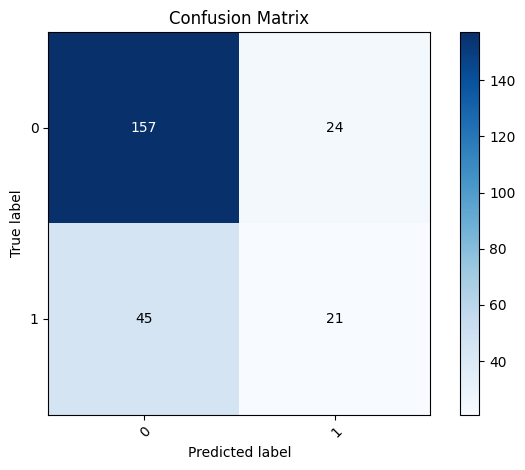

In [98]:
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       xlabel='Predicted label',
       ylabel='True label',
       title='Confusion Matrix')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")
fig.tight_layout()
plt.show()

### **ID3 Using Stratified shuffle**

In [99]:
cyber_encoded_s=pd.read_csv('/content/filterd_dataset.csv')

In [100]:
label_encoder_s = LabelEncoder()
for column in cyber_encoded_s.columns:
    if cyber_encoded_s[column].dtype == 'object':
        cyber_encoded_s[column] = label_encoder.fit_transform(cyber_encoded_s[column])

In [101]:
X_s = cyber_encoded_s.drop('Decision', axis=1) 
y_s = cyber_encoded_s['Decision'] 

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X_s, y_s):
    X_train_s, X_test_s = X_s.iloc[train_index], X_s.iloc[test_index]
    y_train_s, y_test_s = y_s.iloc[train_index], y_s.iloc[test_index]

In [102]:
id3_clf_s = DecisionTreeClassifier(criterion='entropy',random_state=100)


In [103]:
id3_clf_s.fit(X_train_s, y_train_s)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [104]:
X_test

Gender  Age  Education_level  Major  regions  Usage  Usage_skill  \
549        0    1                2     44        7      2            2   
1050       0    0                3     13        7      0            1   
244        1    1                2     17       11      0            0   
553        1    1                2     13        7      0            1   
1165       0    0                3     48        7      0            2   
...      ...  ...              ...    ...      ...    ...          ...   
88         0    2                3     13        1      0            2   
634        1    1                3     17        7      0            2   
298        1    0                3     18        7      0            1   
376        1    3                3     17        7      0            2   
754        0    0                3     36        7      0            1   

      Devices  Internte_type  TypeOfUsage  LaptopOS  MobileOS  Security_tool  \
549        10              7           35         5        11             17   
1050       10              7           16         5        11             46   
244        10              7           16         5        14              6   
553        12              7           37         2        13             21   
1165       10              6           46        22         0              0   
...       ...            ...          ...       ...       ...            ...   
88         14              7           45         5        11              0   
634        14              6           45        25        11             51   
298        10             11           16         5        11             47   
376         2             11           13         5         0              0   
754         0             10           48        21        11             65   

      Security_level  Legit_check  Password_content  Surfing_denger  \
549                4            4                 3               2   
1050               4            4                 3               2   
244                4            1                 0               4   
553                4            2                 2               0   
1165               4            2                 2               0   
...              ...          ...               ...             ...   
88                 4            4                 4               4   
634                3            2                 3               4   
298                5            0                 0               2   
376                2            3                 1               0   
754                0            0                 2               0   

      Privacy_settings  Social_Services  Tearms_conditions  \
549                  2                4                  4   
1050                 0                3                  3   
244                  0                4                  0   
553                  0                1                  2   
1165                 2                4                  2   
...                ...              ...                ...   
88                   4                4                  4   
634                  2                3                  2   
298                  0                2                  0   
376                  0                1                  3   
754                  2                0                  2   

      Important_passowrd  Public_wifi  Target_devices  Soft_update  \
549                    4            3               4            2   
1050                   1            1               2            0   
244                    3            4               4            1   
553                    2            1               3            2   
1165                   1            3               3            1   
...                  ...          ...             ...          ...   
88                     4            4               4            4  

In [105]:
x=88
Encoded_row_s=cyber_encoded_s.iloc[x].to_list()
row_s=cyber2.iloc[x].to_list()

print("Encoded Row: ",Encoded_row_s)
print("Row: ",row_s)

Encoded Row:  [0, 2, 3, 13, 1, 0, 2, 14, 7, 45, 5, 11, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 2, 9, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 2, 2, 3, 0]
Row:  ['female', '40_49', 'undergraduate-(diploma-bsc)', 'computer-science', 'asir', 'frequently-throughout-the-day', 'intermediate-(e-g-able-to-install-and-run-special-software-make-modifications-to-the-settings-of-the-computer-have-a-good-understanding-of-hardware-and-software)', 'smartphone', 'private-wi-fi-(e-g-in-your-home)-mobile/cellular-phone-network-(e-g-3g/4g)', 'social-networks', 'windows-10', 'ios', 'anti-virus', 'somewhat-secure', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'desktop-laptop', 'no-i-think-it-is-automatically-updated', 'i-do-not-feel-that-i-keep-myself-updated', 'internet-website-email-bulletins-blogs-etc-', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neut

In [106]:
data = pd.DataFrame([[0, 2, 3, 16, 1, 0, 2, 14, 7, 49, 5, 11, 0, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 2, 9, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 2, 2, 3]])
X_new = data.values.reshape(1, -1)
y_pred_Stest = id3_clf.predict(X_new)
print(y_pred_Stest)
y_pred_categorical_Stest = label_encoder.inverse_transform(y_pred_Stest)

print('Predicted value:', y_pred_categorical_Stest[0])

[0]
Predicted value: no


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [107]:
y_pred_s = id3_clf_s.predict(X_test_s)

In [108]:
y_pred_categorical_s = label_encoder.inverse_transform(y_pred_s)

y_test_categorical_s = label_encoder.inverse_transform(y_test_s)

In [109]:
print('Predicted values:', y_pred_categorical_s)

print('Actual values:', y_test_categorical_s)

Predicted values: ['no' 'no' 'no' 'no' 'no' 'yes' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'yes'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'yes' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes'
 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'no' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no'
 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'yes' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'yes' 'no'
 'no' 'yes' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no'
 'no' 'yes' 'no' 'no' 'no' 'no' 'no'

In [110]:
y_pred_df_s = pd.DataFrame({'Predicted': y_pred_categorical_s})
y_test_df_s = pd.DataFrame({'Actual': y_test_categorical_s})

result_s = pd.concat([y_test_df_s, y_pred_df_s], axis=1)

print(result_s)

    Actual Predicted
0       no        no
1      yes        no
2       no        no
3      yes        no
4       no        no
..     ...       ...
242     no        no
243     no        no
244     no        no
245     no       yes
246     no        no

[247 rows x 2 columns]


In [111]:
accuracy_s = accuracy_score(y_test_s, y_pred_s)
print('Accuracy: {:.2f}%'.format(accuracy_s*100))

Accuracy: 70.04%


In [112]:
y_test_categorical_encoded_s = label_encoder.transform(y_test_categorical_s)

print(classification_report(y_test_categorical_encoded_s, y_pred_s))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       193
           1       0.30      0.28      0.29        54

    accuracy                           0.70       247
   macro avg       0.55      0.55      0.55       247
weighted avg       0.69      0.70      0.70       247



In [113]:
cm_s = confusion_matrix(y_test_s, y_pred_s)


In [114]:
classes_s = np.unique(y_test_s)


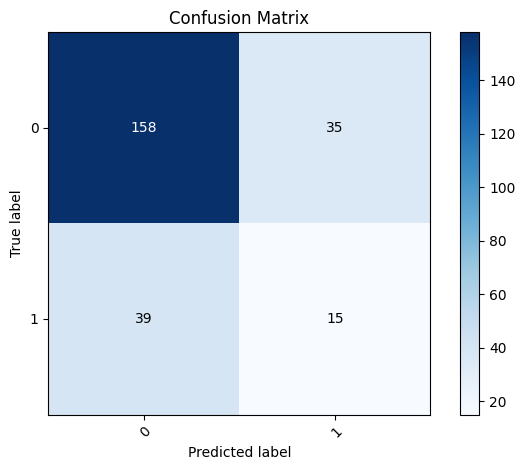

In [115]:
fig, ax = plt.subplots()
im = ax.imshow(cm_s, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm_s.shape[1]),
       yticks=np.arange(cm_s.shape[0]),
       xticklabels=classes_s, yticklabels=classes_s,
       xlabel='Predicted label',
       ylabel='True label',
       title='Confusion Matrix')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(cm_s.shape[0]):
    for j in range(cm_s.shape[1]):
        ax.text(j, i, format(cm_s[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm_s[i, j] > cm_s.max() / 2. else "black")
fig.tight_layout()
plt.show()

### **Random Forest**

In [116]:
cyber_encoded_f=pd.read_csv('/content/filterd_dataset.csv')

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
label_encoder_f = LabelEncoder()
for column in cyber_encoded_f.columns:
    if cyber_encoded_f[column].dtype == 'object':
        cyber_encoded_f[column] = label_encoder_f.fit_transform(cyber_encoded[column])

In [119]:
X = cyber_encoded_f.drop('Decision', axis=1) 
y = cyber_encoded_f['Decision']

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [121]:
rf.fit(X_train_f, y_train_f)

RandomForestClassifier(random_state=42)

In [122]:
X_test_f

Gender  Age  Education_level  Major  regions  Usage  Usage_skill  \
549        0    1                2     44        7      2            2   
1050       0    0                3     13        7      0            1   
244        1    1                2     17       11      0            0   
553        1    1                2     13        7      0            1   
1165       0    0                3     48        7      0            2   
...      ...  ...              ...    ...      ...    ...          ...   
88         0    2                3     13        1      0            2   
634        1    1                3     17        7      0            2   
298        1    0                3     18        7      0            1   
376        1    3                3     17        7      0            2   
754        0    0                3     36        7      0            1   

      Devices  Internte_type  TypeOfUsage  LaptopOS  MobileOS  Security_tool  \
549        10              7           35         5        11             17   
1050       10              7           16         5        11             46   
244        10              7           16         5        14              6   
553        12              7           37         2        13             21   
1165       10              6           46        22         0              0   
...       ...            ...          ...       ...       ...            ...   
88         14              7           45         5        11              0   
634        14              6           45        25        11             51   
298        10             11           16         5        11             47   
376         2             11           13         5         0              0   
754         0             10           48        21        11             65   

      Security_level  Legit_check  Password_content  Surfing_denger  \
549                4            4                 3               2   
1050               4            4                 3               2   
244                4            1                 0               4   
553                4            2                 2               0   
1165               4            2                 2               0   
...              ...          ...               ...             ...   
88                 4            4                 4               4   
634                3            2                 3               4   
298                5            0                 0               2   
376                2            3                 1               0   
754                0            0                 2               0   

      Privacy_settings  Social_Services  Tearms_conditions  \
549                  2                4                  4   
1050                 0                3                  3   
244                  0                4                  0   
553                  0                1                  2   
1165                 2                4                  2   
...                ...              ...                ...   
88                   4                4                  4   
634                  2                3                  2   
298                  0                2                  0   
376                  0                1                  3   
754                  2                0                  2   

      Important_passowrd  Public_wifi  Target_devices  Soft_update  \
549                    4            3               4            2   
1050                   1            1               2            0   
244                    3            4               4            1   
553                    2            1               3            2   
1165                   1            3               3            1   
...                  ...          ...             ...          ...   
88                     4            4               4            4  

In [123]:
x=88
Encoded_row_f=cyber_encoded_f.iloc[x].to_list()
row_f=cyber2.iloc[x].to_list()

print("Encoded Row: ",Encoded_row_f)
print("Row: ",row_f)

Encoded Row:  [0, 2, 3, 13, 1, 0, 2, 14, 7, 45, 5, 11, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 2, 9, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 2, 2, 3, 0]
Row:  ['female', '40_49', 'undergraduate-(diploma-bsc)', 'computer-science', 'asir', 'frequently-throughout-the-day', 'intermediate-(e-g-able-to-install-and-run-special-software-make-modifications-to-the-settings-of-the-computer-have-a-good-understanding-of-hardware-and-software)', 'smartphone', 'private-wi-fi-(e-g-in-your-home)-mobile/cellular-phone-network-(e-g-3g/4g)', 'social-networks', 'windows-10', 'ios', 'anti-virus', 'somewhat-secure', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'desktop-laptop', 'no-i-think-it-is-automatically-updated', 'i-do-not-feel-that-i-keep-myself-updated', 'internet-website-email-bulletins-blogs-etc-', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neut

In [124]:
data = pd.DataFrame([[0, 2, 3, 16, 1, 0, 2, 14, 7, 49, 5, 11, 0, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 2, 9, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 2, 2, 3]])
X_new = data.values.reshape(1, -1)
y_pred_Stest = rf.predict(X_new)
print(y_pred_Stest)
y_pred_categorical_Stest = label_encoder.inverse_transform(y_pred_Stest)

print('Predicted value:', y_pred_categorical_Stest[0])

[0]
Predicted value: no


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [125]:
y_pred_f = rf.predict(X_test_f)

In [126]:
y_pred_cat_f = label_encoder.inverse_transform(y_pred_f)

y_test_cat_f = label_encoder.inverse_transform(y_test_f)

In [127]:
print('Predicted values:', y_pred_cat_f)

print('Actual values:', y_test_cat_f)

Predicted values: ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' '

In [128]:
y_pred_df_f = pd.DataFrame({'Predicted': y_pred_cat_f})
y_test_df_f = pd.DataFrame({'Actual': y_test_cat_f})

result_f = pd.concat([y_test_df_f, y_pred_df_f], axis=1)

print(result_f)

    Actual Predicted
0       no        no
1      yes        no
2      yes        no
3       no        no
4       no        no
..     ...       ...
242     no        no
243     no        no
244     no        no
245     no        no
246    yes        no

[247 rows x 2 columns]


In [129]:
accuracy_f = accuracy_score(y_test_f, y_pred_f)

print('Accuracy: {:.2f}%'.format(accuracy_f*100))

Accuracy: 74.09%


In [130]:
print(classification_report(y_test_f, y_pred_f))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       181
           1       0.75      0.05      0.09        66

    accuracy                           0.74       247
   macro avg       0.75      0.52      0.47       247
weighted avg       0.74      0.74      0.65       247



In [131]:
cm_f = confusion_matrix(y_test_f, y_pred_f)


In [132]:
classes_f = np.unique(y_test_f)


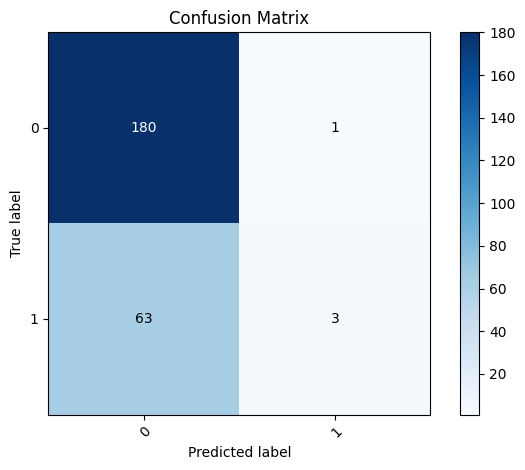

In [133]:
fig, ax = plt.subplots()
im = ax.imshow(cm_f, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm_f.shape[1]),
       yticks=np.arange(cm_f.shape[0]),
       xticklabels=classes_f, yticklabels=classes_f,
       xlabel='Predicted label',
       ylabel='True label',
       title='Confusion Matrix')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(cm_f.shape[0]):
    for j in range(cm_f.shape[1]):
        ax.text(j, i, format(cm_f[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm_f[i, j] > cm_f.max() / 2. else "black")
fig.tight_layout()
plt.show()

### **Random Forest Using Stratified shuffle**

In [134]:
cyber_encoded_f_s=pd.read_csv('/content/filterd_dataset.csv')

In [135]:
from sklearn.ensemble import RandomForestClassifier

In [136]:
label_encoder_f_s = LabelEncoder()
for column in cyber_encoded_f_s.columns:
    if cyber_encoded_f_s[column].dtype == 'object':
        cyber_encoded_f_s[column] = label_encoder_f_s.fit_transform(cyber_encoded[column])

In [137]:
X_f_s = cyber_encoded_f_s.drop('Decision', axis=1)
y_f_s = cyber_encoded_f_s['Decision']

strat = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in strat.split(X_f_s, y_f_s):
    X_train_f_s, X_test_f_s = X_f_s.iloc[train_index], X_f_s.iloc[test_index]
    y_train_f_s, y_test_f_s = y_f_s.iloc[train_index], y_f_s.iloc[test_index]

In [138]:
rf_s = RandomForestClassifier(n_estimators=100, random_state=42)

In [139]:
rf_s.fit(X_train_f_s, y_train_f_s)

RandomForestClassifier(random_state=42)

In [140]:
X_test_f_s

Gender  Age  Education_level  Major  regions  Usage  Usage_skill  \
638        1    1                2     13        7      0            0   
245        1    1                3     17       11      0            0   
1023       0    0                3     53        7      0            2   
283        1    1                3     13        7      0            2   
882        1    0                3     13        7      0            2   
...      ...  ...              ...    ...      ...    ...          ...   
907        0    0                0     47        7      0            0   
661        1    1                3     10       10      0            2   
657        1    2                2     17       12      0            2   
124        0    0                2     36       11      0            2   
655        1    2                2     13       12      0            2   

      Devices  Internte_type  TypeOfUsage  LaptopOS  MobileOS  Security_tool  \
638        10              2           14        25        11             37   
245        14              7           14        21         0              9   
1023       10              7           16         5        11             33   
283        10             14           16        21         0             31   
882        14              2           17        25        11             48   
...       ...            ...          ...       ...       ...            ...   
907        12              7           12         5        14             33   
661        14              7           16        25        11             35   
657         2             14           37         8        11             18   
124         8              7           16        28        11              7   
655         2              7           14        25         0             16   

      Security_level  Legit_check  Password_content  Surfing_denger  \
638                4            2                 2               2   
245                3            2                 3               0   
1023               4            2                 3               0   
283                4            0                 0               0   
882                0            0                 2               0   
...              ...          ...               ...             ...   
907                2            2                 3               0   
661                4            4                 4               0   
657                4            2                 2               2   
124                4            2                 2               0   
655                4            0                 3               0   

      Privacy_settings  Social_Services  Tearms_conditions  \
638                  2                2                  0   
245                  0                2                  0   
1023                 0                3                  3   
283                  0                0                  0   
882                  3                2                  4   
...                ...              ...                ...   
907                  2                4                  1   
661                  0                0                  3   
657                  2                2                  2   
124                  0                1                  1   
655                  0                4                  3   

      Important_passowrd  Public_wifi  Target_devices  Soft_update  \
638                    2            4               2            2   
245                    0            3               3            2   
1023                   3            4               4            2   
283                    0            1               2            2   
882                    0            2               4            2   
...                  ...          ...             ...          ...   
907                    1            4               2            2  

In [141]:
x=88
Encoded_row_f_s=cyber_encoded_f_s.iloc[x].to_list()
row_f_s=cyber2.iloc[x].to_list()

print("Encoded Row: ",Encoded_row_f_s)
print("Row: ",row_f_s)

Encoded Row:  [0, 2, 3, 13, 1, 0, 2, 14, 7, 45, 5, 11, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 2, 9, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 2, 2, 3, 0]
Row:  ['female', '40_49', 'undergraduate-(diploma-bsc)', 'computer-science', 'asir', 'frequently-throughout-the-day', 'intermediate-(e-g-able-to-install-and-run-special-software-make-modifications-to-the-settings-of-the-computer-have-a-good-understanding-of-hardware-and-software)', 'smartphone', 'private-wi-fi-(e-g-in-your-home)-mobile/cellular-phone-network-(e-g-3g/4g)', 'social-networks', 'windows-10', 'ios', 'anti-virus', 'somewhat-secure', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'desktop-laptop', 'no-i-think-it-is-automatically-updated', 'i-do-not-feel-that-i-keep-myself-updated', 'internet-website-email-bulletins-blogs-etc-', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neut

In [142]:
data_s = pd.DataFrame([[0, 2, 3, 16, 1, 0, 2, 14, 7, 49, 5, 11, 0, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 2, 9, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 2, 2, 3]])
X_new_s = data_s.values.reshape(1, -1)
y_pred_Stest_s = rf_s.predict(X_new_s)
print(y_pred_Stest_s)
y_pred_categorical_Stest_s = label_encoder.inverse_transform(y_pred_Stest_s)

print('Predicted value:', y_pred_categorical_Stest_s[0])

[0]
Predicted value: no


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [143]:
y_pred_f_s = rf_s.predict(X_test_f_s)

In [144]:
y_pred_cat__f_s = label_encoder.inverse_transform(y_pred_f_s)

y_test_cat_f_s = label_encoder.inverse_transform(y_test_f_s)

In [145]:
print('Predicted values:', y_pred_cat__f_s)

print('Actual values:', y_test_cat_f_s)

Predicted values: ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'n

In [146]:
y_pred_df_f_s = pd.DataFrame({'Predicted': y_pred_cat__f_s})
y_test_df_f_s = pd.DataFrame({'Actual': y_test_cat_f_s})

result_f_s = pd.concat([y_test_df_f_s, y_pred_df_f_s], axis=1)

print(result_f_s)

    Actual Predicted
0       no        no
1      yes        no
2       no        no
3      yes        no
4       no        no
..     ...       ...
242     no        no
243     no        no
244     no        no
245     no        no
246     no        no

[247 rows x 2 columns]


In [147]:
accuracy_f = accuracy_score(y_test_f_s, y_pred_f_s)

print('Accuracy: {:.2f}%'.format(accuracy_f*100))

Accuracy: 78.95%


In [148]:
print(classification_report(y_test_f_s, y_pred_f_s))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       193
           1       1.00      0.04      0.07        54

    accuracy                           0.79       247
   macro avg       0.89      0.52      0.48       247
weighted avg       0.83      0.79      0.70       247



In [149]:
cm_f_s = confusion_matrix(y_test_f_s, y_pred_f_s)

In [150]:
classes_f_s = np.unique(y_test_f_s)

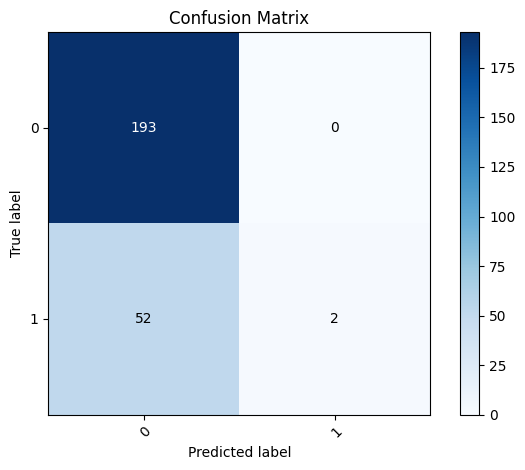

In [151]:
fig, ax = plt.subplots()
im = ax.imshow(cm_f_s, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm_f_s.shape[1]),
       yticks=np.arange(cm_f_s.shape[0]),
       xticklabels=classes_f_s, yticklabels=classes_f_s,
       xlabel='Predicted label',
       ylabel='True label',
       title='Confusion Matrix')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(cm_f_s.shape[0]):
    for j in range(cm_f_s.shape[1]):
        ax.text(j, i, format(cm_f_s[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm_f_s[i, j] > cm_f_s.max() / 2. else "black")
fig.tight_layout()
plt.show()

### **SVM**

In [152]:
from sklearn import svm

In [153]:
cyber_encoded_svm=pd.read_csv('/content/filterd_dataset.csv')

In [154]:
label_encoder_svm = LabelEncoder()
for column in cyber_encoded_svm.columns:
    if cyber_encoded_svm[column].dtype == 'object':
        cyber_encoded_svm[column] = label_encoder_svm.fit_transform(cyber_encoded_svm[column])

In [155]:
X = cyber_encoded_svm.drop('Decision', axis=1)
y = cyber_encoded_svm['Decision'] 

X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size=0.2, random_state=42)



In [156]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train_svm, y_train_svm)

SVC(kernel='linear')

In [157]:
X_test_svm

Gender  Age  Education_level  Major  regions  Usage  Usage_skill  \
549        0    1                2     44        7      2            2   
1050       0    0                3     13        7      0            1   
244        1    1                2     17       11      0            0   
553        1    1                2     13        7      0            1   
1165       0    0                3     48        7      0            2   
...      ...  ...              ...    ...      ...    ...          ...   
88         0    2                3     13        1      0            2   
634        1    1                3     17        7      0            2   
298        1    0                3     18        7      0            1   
376        1    3                3     17        7      0            2   
754        0    0                3     36        7      0            1   

      Devices  Internte_type  TypeOfUsage  LaptopOS  MobileOS  Security_tool  \
549        10              7           35         5        11             17   
1050       10              7           16         5        11             46   
244        10              7           16         5        14              6   
553        12              7           37         2        13             21   
1165       10              6           46        22         0              0   
...       ...            ...          ...       ...       ...            ...   
88         14              7           45         5        11              0   
634        14              6           45        25        11             51   
298        10             11           16         5        11             47   
376         2             11           13         5         0              0   
754         0             10           48        21        11             65   

      Security_level  Legit_check  Password_content  Surfing_denger  \
549                4            4                 3               2   
1050               4            4                 3               2   
244                4            1                 0               4   
553                4            2                 2               0   
1165               4            2                 2               0   
...              ...          ...               ...             ...   
88                 4            4                 4               4   
634                3            2                 3               4   
298                5            0                 0               2   
376                2            3                 1               0   
754                0            0                 2               0   

      Privacy_settings  Social_Services  Tearms_conditions  \
549                  2                4                  4   
1050                 0                3                  3   
244                  0                4                  0   
553                  0                1                  2   
1165                 2                4                  2   
...                ...              ...                ...   
88                   4                4                  4   
634                  2                3                  2   
298                  0                2                  0   
376                  0                1                  3   
754                  2                0                  2   

      Important_passowrd  Public_wifi  Target_devices  Soft_update  \
549                    4            3               4            2   
1050                   1            1               2            0   
244                    3            4               4            1   
553                    2            1               3            2   
1165                   1            3               3            1   
...                  ...          ...             ...          ...   
88                     4            4               4            4  

In [158]:
x=88
Encoded_row_svm=cyber_encoded_svm.iloc[x].to_list()
row_svm=cyber2.iloc[x].to_list()

print("Encoded Row: ",Encoded_row_svm)
print("Row: ",row_svm)

Encoded Row:  [0, 2, 3, 13, 1, 0, 2, 14, 7, 45, 5, 11, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 2, 9, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 2, 2, 3, 0]
Row:  ['female', '40_49', 'undergraduate-(diploma-bsc)', 'computer-science', 'asir', 'frequently-throughout-the-day', 'intermediate-(e-g-able-to-install-and-run-special-software-make-modifications-to-the-settings-of-the-computer-have-a-good-understanding-of-hardware-and-software)', 'smartphone', 'private-wi-fi-(e-g-in-your-home)-mobile/cellular-phone-network-(e-g-3g/4g)', 'social-networks', 'windows-10', 'ios', 'anti-virus', 'somewhat-secure', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'desktop-laptop', 'no-i-think-it-is-automatically-updated', 'i-do-not-feel-that-i-keep-myself-updated', 'internet-website-email-bulletins-blogs-etc-', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neut

In [159]:
data_svm = pd.DataFrame([[0, 2, 3, 16, 1, 0, 2, 14, 7, 49, 5, 11, 0, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 2, 9, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 2, 2, 3]])
X_new_svm = data.values.reshape(1, -1)
y_pred_test_svm = rf.predict(X_new_svm)
print(y_pred_test_svm)
y_pred_categorical_test_svm = label_encoder.inverse_transform(y_pred_test_svm)

print('Predicted value:', y_pred_categorical_test_svm[0])

[0]
Predicted value: no


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [160]:
y_pred_svm = rf.predict(X_test_svm)

In [161]:
y_pred_cat_svm = label_encoder.inverse_transform(y_pred_svm)

y_test_cat_svm = label_encoder.inverse_transform(y_test_svm)

In [162]:
print('Predicted values:', y_pred_cat_svm)

print('Actual values:', y_test_cat_svm)

Predicted values: ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' '

In [163]:
y_pred_df_svm = pd.DataFrame({'Predicted': y_pred_cat_svm})
y_test_df_svm = pd.DataFrame({'Actual': y_test_cat_svm})

result_svm = pd.concat([y_test_df_svm, y_pred_df_svm], axis=1)

print(result_svm)

    Actual Predicted
0       no        no
1      yes        no
2      yes        no
3       no        no
4       no        no
..     ...       ...
242     no        no
243     no        no
244     no        no
245     no        no
246    yes        no

[247 rows x 2 columns]


In [164]:
y_pred_svm = clf.predict(X_test_svm)

In [165]:
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)

print('Accuracy: {:.2f}%'.format(accuracy_svm*100))

Accuracy: 73.28%


In [166]:
print(classification_report(y_test_svm, y_pred_svm))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85       181
           1       0.00      0.00      0.00        66

    accuracy                           0.73       247
   macro avg       0.37      0.50      0.42       247
weighted avg       0.54      0.73      0.62       247



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [167]:
cm_svm = confusion_matrix(y_test_svm, y_pred_svm)

In [168]:
classes_svm = np.unique(y_test_svm)

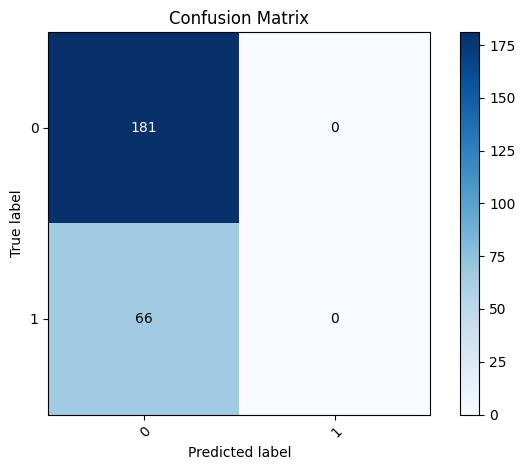

In [169]:
fig, ax = plt.subplots()
im = ax.imshow(cm_svm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm_svm.shape[1]),
       yticks=np.arange(cm_svm.shape[0]),
       xticklabels=classes_svm, yticklabels=classes_svm,
       xlabel='Predicted label',
       ylabel='True label',
       title='Confusion Matrix')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(cm_svm.shape[0]):
    for j in range(cm_svm.shape[1]):
        ax.text(j, i, format(cm_svm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm_svm[i, j] > cm_svm.max() / 2. else "black")
fig.tight_layout()
plt.show()

### **SVM Using Stratified shuffle**

In [170]:
cyber_encoded_s_svm=pd.read_csv('/content/filterd_dataset.csv')

In [171]:
from sklearn import svm

In [172]:
label_encoder_s_svm = LabelEncoder()
for column in cyber_encoded_s_svm.columns:
    if cyber_encoded_s_svm[column].dtype == 'object':
        cyber_encoded_s_svm[column] = label_encoder_s_svm.fit_transform(cyber_encoded_s_svm[column])

In [173]:
X_s_svm = cyber_encoded_s_svm.drop('Decision', axis=1) # Features
y_s_svm = cyber_encoded_s_svm['Decision'] # Target variable

strat = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in strat.split(X_s_svm, y_s_svm):
    X_train_s_svm, X_test_s_svm = X_s_svm.iloc[train_index], X_s_svm.iloc[test_index]
    y_train_s_svm, y_test_s_svm = y_s_svm.iloc[train_index], y_s_svm.iloc[test_index]

In [174]:
svm = svm.SVC(kernel='linear')
svm.fit(X_train_s_svm, y_train_s_svm)

SVC(kernel='linear')

In [175]:
X_test_s_svm

Gender  Age  Education_level  Major  regions  Usage  Usage_skill  \
638        1    1                2     13        7      0            0   
245        1    1                3     17       11      0            0   
1023       0    0                3     53        7      0            2   
283        1    1                3     13        7      0            2   
882        1    0                3     13        7      0            2   
...      ...  ...              ...    ...      ...    ...          ...   
907        0    0                0     47        7      0            0   
661        1    1                3     10       10      0            2   
657        1    2                2     17       12      0            2   
124        0    0                2     36       11      0            2   
655        1    2                2     13       12      0            2   

      Devices  Internte_type  TypeOfUsage  LaptopOS  MobileOS  Security_tool  \
638        10              2           14        25        11             37   
245        14              7           14        21         0              9   
1023       10              7           16         5        11             33   
283        10             14           16        21         0             31   
882        14              2           17        25        11             48   
...       ...            ...          ...       ...       ...            ...   
907        12              7           12         5        14             33   
661        14              7           16        25        11             35   
657         2             14           37         8        11             18   
124         8              7           16        28        11              7   
655         2              7           14        25         0             16   

      Security_level  Legit_check  Password_content  Surfing_denger  \
638                4            2                 2               2   
245                3            2                 3               0   
1023               4            2                 3               0   
283                4            0                 0               0   
882                0            0                 2               0   
...              ...          ...               ...             ...   
907                2            2                 3               0   
661                4            4                 4               0   
657                4            2                 2               2   
124                4            2                 2               0   
655                4            0                 3               0   

      Privacy_settings  Social_Services  Tearms_conditions  \
638                  2                2                  0   
245                  0                2                  0   
1023                 0                3                  3   
283                  0                0                  0   
882                  3                2                  4   
...                ...              ...                ...   
907                  2                4                  1   
661                  0                0                  3   
657                  2                2                  2   
124                  0                1                  1   
655                  0                4                  3   

      Important_passowrd  Public_wifi  Target_devices  Soft_update  \
638                    2            4               2            2   
245                    0            3               3            2   
1023                   3            4               4            2   
283                    0            1               2            2   
882                    0            2               4            2   
...                  ...          ...             ...          ...   
907                    1            4               2            2  

In [176]:
x=88
Encoded_row_svm=cyber_encoded_s_svm.iloc[x].to_list()
row_svm=cyber2.iloc[x].to_list()

print("Encoded Row: ",Encoded_row_svm)
print("Row: ",row_svm)

Encoded Row:  [0, 2, 3, 13, 1, 0, 2, 14, 7, 45, 5, 11, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 2, 9, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 2, 2, 3, 0]
Row:  ['female', '40_49', 'undergraduate-(diploma-bsc)', 'computer-science', 'asir', 'frequently-throughout-the-day', 'intermediate-(e-g-able-to-install-and-run-special-software-make-modifications-to-the-settings-of-the-computer-have-a-good-understanding-of-hardware-and-software)', 'smartphone', 'private-wi-fi-(e-g-in-your-home)-mobile/cellular-phone-network-(e-g-3g/4g)', 'social-networks', 'windows-10', 'ios', 'anti-virus', 'somewhat-secure', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'desktop-laptop', 'no-i-think-it-is-automatically-updated', 'i-do-not-feel-that-i-keep-myself-updated', 'internet-website-email-bulletins-blogs-etc-', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neut

In [177]:
data_svm = pd.DataFrame([[0, 2, 3, 16, 1, 0, 2, 14, 7, 49, 5, 11, 0, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 2, 9, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 2, 2, 3]])
X_new_svm = data.values.reshape(1, -1)
y_pred_test_svm = svm.predict(X_new_svm)
print(y_pred_test_svm)
y_pred_categorical_test_svm = label_encoder.inverse_transform(y_pred_test_svm)

print('Predicted value:', y_pred_categorical_test_svm[0])

[0]
Predicted value: no


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [178]:
y_pred_s_svm = svm.predict(X_test_s_svm)

In [179]:
y_pred_cat_s_svm = label_encoder.inverse_transform(y_pred_s_svm)

y_test_cat_s_svm = label_encoder.inverse_transform(y_test_s_svm)

In [180]:
print('Predicted values:', y_pred_cat_s_svm)

print('Actual values:', y_test_cat_s_svm)

Predicted values: ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no

In [181]:
y_pred_df_s_svm = pd.DataFrame({'Predicted': y_pred_cat_s_svm})
y_test_df_s_svm = pd.DataFrame({'Actual': y_test_cat_s_svm})

result_s_svm = pd.concat([y_test_df_s_svm, y_pred_df_s_svm], axis=1)

print(result_s_svm)

    Actual Predicted
0       no        no
1      yes        no
2       no        no
3      yes        no
4       no        no
..     ...       ...
242     no        no
243     no        no
244     no        no
245     no        no
246     no        no

[247 rows x 2 columns]


In [182]:
y_pred_s_svm = svm.predict(X_test_s_svm)

In [183]:
accuracy_s_svm = accuracy_score(y_test_s_svm, y_pred_s_svm)

print('Accuracy: {:.2f}%'.format(accuracy_s_svm*100))

Accuracy: 78.14%


In [184]:
print(classification_report(y_test_s_svm, y_pred_s_svm))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       193
           1       0.00      0.00      0.00        54

    accuracy                           0.78       247
   macro avg       0.39      0.50      0.44       247
weighted avg       0.61      0.78      0.69       247



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [185]:
cm_s_svm = confusion_matrix(y_test_s_svm, y_pred_s_svm)


In [186]:
classes_s_svm = np.unique(y_test_s_svm)


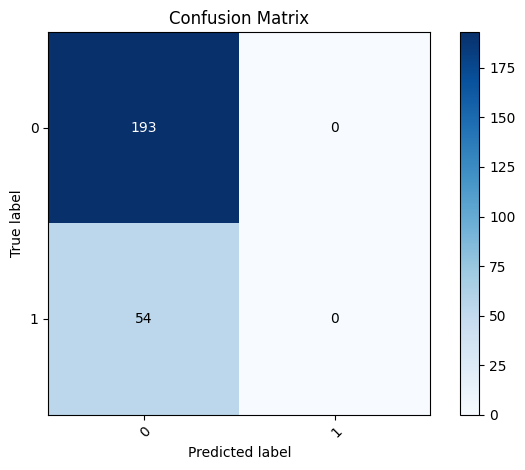

In [187]:
fig, ax = plt.subplots()
im = ax.imshow(cm_s_svm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm_s_svm.shape[1]),
       yticks=np.arange(cm_s_svm.shape[0]),
       xticklabels=classes_s_svm, yticklabels=classes_s_svm,
       xlabel='Predicted label',
       ylabel='True label',
       title='Confusion Matrix')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(cm_s_svm.shape[0]):
    for j in range(cm_s_svm.shape[1]):
        ax.text(j, i, format(cm_s_svm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm_s_svm[i, j] > cm_s_svm.max() / 2. else "black")
fig.tight_layout()
plt.show()

### **KNN**

In [188]:
from sklearn.neighbors import KNeighborsClassifier

In [189]:
cyber_encoded_knn=pd.read_csv('/content/filterd_dataset.csv')

In [190]:
label_encoder_knn = LabelEncoder()
for column in cyber_encoded_knn.columns:
    if cyber_encoded_knn[column].dtype == 'object':
        cyber_encoded_knn[column] = label_encoder_knn.fit_transform(cyber_encoded_knn[column])

In [191]:
X = cyber_encoded_knn.drop('Decision', axis=1)
y = cyber_encoded_knn['Decision']

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, random_state=42)

In [192]:
knn = KNeighborsClassifier(n_neighbors=3)

In [193]:
knn.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(n_neighbors=3)

In [194]:
X_test_knn

Gender  Age  Education_level  Major  regions  Usage  Usage_skill  \
549        0    1                2     44        7      2            2   
1050       0    0                3     13        7      0            1   
244        1    1                2     17       11      0            0   
553        1    1                2     13        7      0            1   
1165       0    0                3     48        7      0            2   
...      ...  ...              ...    ...      ...    ...          ...   
88         0    2                3     13        1      0            2   
634        1    1                3     17        7      0            2   
298        1    0                3     18        7      0            1   
376        1    3                3     17        7      0            2   
754        0    0                3     36        7      0            1   

      Devices  Internte_type  TypeOfUsage  LaptopOS  MobileOS  Security_tool  \
549        10              7           35         5        11             17   
1050       10              7           16         5        11             46   
244        10              7           16         5        14              6   
553        12              7           37         2        13             21   
1165       10              6           46        22         0              0   
...       ...            ...          ...       ...       ...            ...   
88         14              7           45         5        11              0   
634        14              6           45        25        11             51   
298        10             11           16         5        11             47   
376         2             11           13         5         0              0   
754         0             10           48        21        11             65   

      Security_level  Legit_check  Password_content  Surfing_denger  \
549                4            4                 3               2   
1050               4            4                 3               2   
244                4            1                 0               4   
553                4            2                 2               0   
1165               4            2                 2               0   
...              ...          ...               ...             ...   
88                 4            4                 4               4   
634                3            2                 3               4   
298                5            0                 0               2   
376                2            3                 1               0   
754                0            0                 2               0   

      Privacy_settings  Social_Services  Tearms_conditions  \
549                  2                4                  4   
1050                 0                3                  3   
244                  0                4                  0   
553                  0                1                  2   
1165                 2                4                  2   
...                ...              ...                ...   
88                   4                4                  4   
634                  2                3                  2   
298                  0                2                  0   
376                  0                1                  3   
754                  2                0                  2   

      Important_passowrd  Public_wifi  Target_devices  Soft_update  \
549                    4            3               4            2   
1050                   1            1               2            0   
244                    3            4               4            1   
553                    2            1               3            2   
1165                   1            3               3            1   
...                  ...          ...             ...          ...   
88                     4            4               4            4  

In [195]:
x=88
Encoded_row_knn=cyber_encoded_knn.iloc[x].to_list()
row_knn=cyber2.iloc[x].to_list()

print("Encoded Row: ",Encoded_row_knn)
print("Row: ",row_knn)

Encoded Row:  [0, 2, 3, 13, 1, 0, 2, 14, 7, 45, 5, 11, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 2, 9, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 2, 2, 3, 0]
Row:  ['female', '40_49', 'undergraduate-(diploma-bsc)', 'computer-science', 'asir', 'frequently-throughout-the-day', 'intermediate-(e-g-able-to-install-and-run-special-software-make-modifications-to-the-settings-of-the-computer-have-a-good-understanding-of-hardware-and-software)', 'smartphone', 'private-wi-fi-(e-g-in-your-home)-mobile/cellular-phone-network-(e-g-3g/4g)', 'social-networks', 'windows-10', 'ios', 'anti-virus', 'somewhat-secure', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'desktop-laptop', 'no-i-think-it-is-automatically-updated', 'i-do-not-feel-that-i-keep-myself-updated', 'internet-website-email-bulletins-blogs-etc-', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neut

In [196]:
data_knn = pd.DataFrame([[0, 2, 3, 16, 1, 0, 2, 14, 7, 49, 5, 11, 0, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 2, 9, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 2, 2, 3]])
X_new_knn = data.values.reshape(1, -1)
y_pred_test_knn = knn.predict(X_new_knn)
print(y_pred_test_knn)
y_pred_categorical_test_knn = label_encoder.inverse_transform(y_pred_test_knn)

print('Predicted value:', y_pred_categorical_test_knn[0])

[0]
Predicted value: no


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [197]:
y_pred_knn = knn.predict(X_test_knn)

In [198]:
y_pred_cat_knn = label_encoder.inverse_transform(y_pred_knn)

y_test_cat_knn = label_encoder.inverse_transform(y_test_knn)

In [199]:
print('Predicted values:', y_pred_cat_knn)

print('Actual values:', y_test_cat_knn)

Predicted values: ['no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no' 'no'
 'yes' 'yes' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'yes' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no'
 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'yes' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'yes' 'yes' 'no' 'no' 'no' 'no' 'no' 'n

In [200]:
y_pred_df_knn = pd.DataFrame({'Predicted': y_pred_cat_knn})
y_test_df_knn = pd.DataFrame({'Actual': y_test_cat_knn})

result = pd.concat([y_test_df_knn, y_pred_df_knn], axis=1)

print(result)

    Actual Predicted
0       no        no
1      yes        no
2      yes        no
3       no        no
4       no        no
..     ...       ...
242     no        no
243     no        no
244     no       yes
245     no        no
246    yes        no

[247 rows x 2 columns]


In [201]:
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)

print('Accuracy: {:.2f}%'.format(accuracy_knn*100))

Accuracy: 70.45%


In [202]:
print(classification_report(y_test_knn, y_pred_knn))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82       181
           1       0.35      0.12      0.18        66

    accuracy                           0.70       247
   macro avg       0.54      0.52      0.50       247
weighted avg       0.64      0.70      0.65       247



In [203]:
cm_knn = confusion_matrix(y_test_knn, y_pred_knn)

In [204]:
classes_knn = np.unique(y_test_knn)

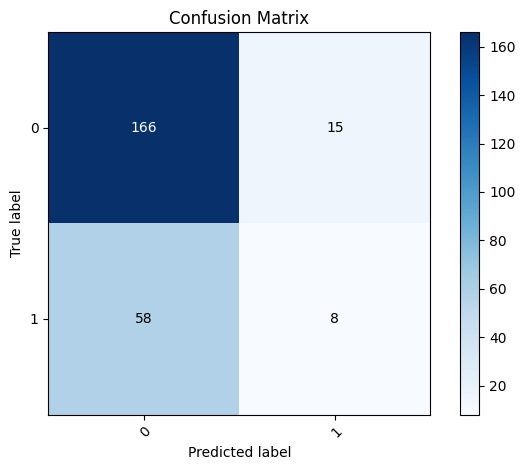

In [205]:
fig, ax = plt.subplots()
im = ax.imshow(cm_knn, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm_knn.shape[1]),
       yticks=np.arange(cm_knn.shape[0]),
       xticklabels=classes_knn, yticklabels=classes_knn,
       xlabel='Predicted label',
       ylabel='True label',
       title='Confusion Matrix')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(cm_knn.shape[0]):
    for j in range(cm_knn.shape[1]):
        ax.text(j, i, format(cm_knn[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm_knn[i, j] > cm_knn.max() / 2. else "black")
fig.tight_layout()
plt.show()

### **KNN Using Stratified shuffle**

In [206]:
cyber_encoded_s_knn=pd.read_csv('/content/filterd_dataset.csv')

In [207]:
from sklearn.neighbors import KNeighborsClassifier

In [208]:
label_encoder_s_knn = LabelEncoder()
for column in cyber_encoded_s_knn.columns:
    if cyber_encoded_s_knn[column].dtype == 'object':
        cyber_encoded_s_knn[column] = label_encoder_s_knn.fit_transform(cyber_encoded_s_knn[column])

In [209]:
X_s_knn = cyber_encoded_s_knn.drop('Decision', axis=1) 
y_s_knn = cyber_encoded_s_knn['Decision']

strat = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in strat.split(X_s_knn, y_s_knn):
    X_train_s_knn, X_test_s_knn = X_s_knn.iloc[train_index], X_s_knn.iloc[test_index]
    y_train_s_knn, y_test_s_knn = y_s_knn.iloc[train_index], y_s_knn.iloc[test_index]

In [210]:
knn = KNeighborsClassifier(n_neighbors=3)

In [211]:
knn.fit(X_train_s_knn, y_train_s_knn)

KNeighborsClassifier(n_neighbors=3)

In [212]:
X_test_s_knn

Gender  Age  Education_level  Major  regions  Usage  Usage_skill  \
638        1    1                2     13        7      0            0   
245        1    1                3     17       11      0            0   
1023       0    0                3     53        7      0            2   
283        1    1                3     13        7      0            2   
882        1    0                3     13        7      0            2   
...      ...  ...              ...    ...      ...    ...          ...   
907        0    0                0     47        7      0            0   
661        1    1                3     10       10      0            2   
657        1    2                2     17       12      0            2   
124        0    0                2     36       11      0            2   
655        1    2                2     13       12      0            2   

      Devices  Internte_type  TypeOfUsage  LaptopOS  MobileOS  Security_tool  \
638        10              2           14        25        11             37   
245        14              7           14        21         0              9   
1023       10              7           16         5        11             33   
283        10             14           16        21         0             31   
882        14              2           17        25        11             48   
...       ...            ...          ...       ...       ...            ...   
907        12              7           12         5        14             33   
661        14              7           16        25        11             35   
657         2             14           37         8        11             18   
124         8              7           16        28        11              7   
655         2              7           14        25         0             16   

      Security_level  Legit_check  Password_content  Surfing_denger  \
638                4            2                 2               2   
245                3            2                 3               0   
1023               4            2                 3               0   
283                4            0                 0               0   
882                0            0                 2               0   
...              ...          ...               ...             ...   
907                2            2                 3               0   
661                4            4                 4               0   
657                4            2                 2               2   
124                4            2                 2               0   
655                4            0                 3               0   

      Privacy_settings  Social_Services  Tearms_conditions  \
638                  2                2                  0   
245                  0                2                  0   
1023                 0                3                  3   
283                  0                0                  0   
882                  3                2                  4   
...                ...              ...                ...   
907                  2                4                  1   
661                  0                0                  3   
657                  2                2                  2   
124                  0                1                  1   
655                  0                4                  3   

      Important_passowrd  Public_wifi  Target_devices  Soft_update  \
638                    2            4               2            2   
245                    0            3               3            2   
1023                   3            4               4            2   
283                    0            1               2            2   
882                    0            2               4            2   
...                  ...          ...             ...          ...   
907                    1            4               2            2  

In [213]:
x=88
Encoded_row_s_knn=cyber_encoded_s_knn.iloc[x].to_list()
row_s_knn=cyber2.iloc[x].to_list()

print("Encoded Row: ",Encoded_row_s_knn)
print("Row: ",row_s_knn)

Encoded Row:  [0, 2, 3, 13, 1, 0, 2, 14, 7, 45, 5, 11, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 2, 9, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 2, 2, 3, 0]
Row:  ['female', '40_49', 'undergraduate-(diploma-bsc)', 'computer-science', 'asir', 'frequently-throughout-the-day', 'intermediate-(e-g-able-to-install-and-run-special-software-make-modifications-to-the-settings-of-the-computer-have-a-good-understanding-of-hardware-and-software)', 'smartphone', 'private-wi-fi-(e-g-in-your-home)-mobile/cellular-phone-network-(e-g-3g/4g)', 'social-networks', 'windows-10', 'ios', 'anti-virus', 'somewhat-secure', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'sometimes', 'desktop-laptop', 'no-i-think-it-is-automatically-updated', 'i-do-not-feel-that-i-keep-myself-updated', 'internet-website-email-bulletins-blogs-etc-', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neut

In [214]:
data_s_knn = pd.DataFrame([[0, 2, 3, 16, 1, 0, 2, 14, 7, 49, 5, 11, 0, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 2, 9, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 2, 2, 3]])
X_new_s_knn = data.values.reshape(1, -1)
y_pred_test_s_knn = knn.predict(X_new_s_knn)
print(y_pred_test_s_knn)
y_pred_categorical_test_s_knn = label_encoder.inverse_transform(y_pred_test_s_knn)

print('Predicted value:', y_pred_categorical_test_s_knn[0])

[0]
Predicted value: no


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [215]:
y_pred_s_knn = knn.predict(X_test_s_knn)

In [216]:
y_pred_cat_s_knn = label_encoder.inverse_transform(y_pred_s_knn)

y_test_cat_s_knn = label_encoder.inverse_transform(y_test_s_knn)

In [217]:
print('Predicted values:', y_pred_cat_s_knn)

print('Actual values:', y_test_cat_s_knn)

Predicted values: ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no'
 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no'
 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no'
 'no' 'yes' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'yes' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'yes' 'yes' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'yes' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'yes' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'yes'
 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'ye

In [218]:
y_pred_df_s_knn = pd.DataFrame({'Predicted': y_pred_cat_s_knn})
y_test_df_s_knn = pd.DataFrame({'Actual': y_test_cat_s_knn})

result_s_knn = pd.concat([y_test_df_s_knn, y_pred_df_s_knn], axis=1)

print(result_s_knn)

    Actual Predicted
0       no        no
1      yes        no
2       no        no
3      yes        no
4       no        no
..     ...       ...
242     no        no
243     no        no
244     no       yes
245     no        no
246     no        no

[247 rows x 2 columns]


In [219]:
accuracy_s_knn = accuracy_score(y_test_s_knn, y_pred_s_knn)

print('Accuracy: {:.2f}%'.format(accuracy_s_knn*100))

Accuracy: 73.68%


In [220]:
print(classification_report(y_test_s_knn, y_pred_s_knn))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       193
           1       0.31      0.17      0.22        54

    accuracy                           0.74       247
   macro avg       0.55      0.53      0.53       247
weighted avg       0.69      0.74      0.71       247



In [221]:
cm_s_knn = confusion_matrix(y_test_s_knn, y_pred_s_knn)

In [222]:
classes_s_knn = np.unique(y_test_s_knn)

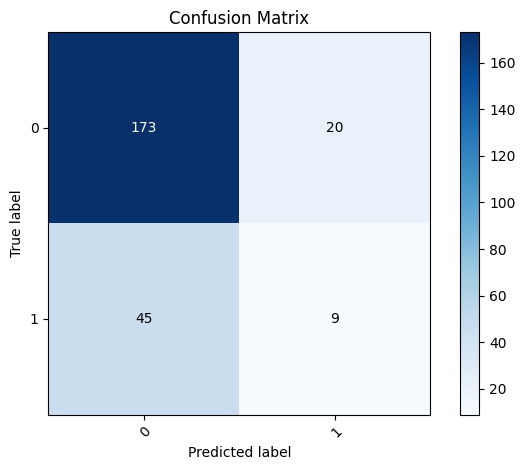

In [223]:
fig, ax = plt.subplots()
im = ax.imshow(cm_s_knn, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm_s_knn.shape[1]),
       yticks=np.arange(cm_s_knn.shape[0]),
       xticklabels=classes_s_knn, yticklabels=classes_s_knn,
       xlabel='Predicted label',
       ylabel='True label',
       title='Confusion Matrix')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(cm_s_knn.shape[0]):
    for j in range(cm_s_knn.shape[1]):
        ax.text(j, i, format(cm_s_knn[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm_s_knn[i, j] > cm_s_knn.max() / 2. else "black")
fig.tight_layout()
plt.show()